# Gauss積分, ガンマ函数, ベータ函数

* 黒木玄
* 2022-04-10～2022-04-12
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gauss積分" data-toc-modified-id="Gauss積分-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gauss積分</a></span><ul class="toc-item"><li><span><a href="#Gauss積分の定義" data-toc-modified-id="Gauss積分の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gauss積分の定義</a></span></li><li><span><a href="#問題:-正規分布での確率の総和" data-toc-modified-id="問題:-正規分布での確率の総和-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>問題: 正規分布での確率の総和</a></span></li><li><span><a href="#正規分布の定義" data-toc-modified-id="正規分布の定義-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>正規分布の定義</a></span></li><li><span><a href="#$p(x|\theta)$-という記号法について" data-toc-modified-id="$p(x|\theta)$-という記号法について-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>$p(x|\theta)$ という記号法について</a></span></li><li><span><a href="#問題:-Gauss積分の拡張とガンマ函数の関係" data-toc-modified-id="問題:-Gauss積分の拡張とガンマ函数の関係-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>問題: Gauss積分の拡張とガンマ函数の関係</a></span></li></ul></li><li><span><a href="#ガンマ函数" data-toc-modified-id="ガンマ函数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ガンマ函数</a></span><ul class="toc-item"><li><span><a href="#ガンマ函数の定義" data-toc-modified-id="ガンマ函数の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ガンマ函数の定義</a></span></li><li><span><a href="#問題:-ガンマ函数はこの形でよく使われる" data-toc-modified-id="問題:-ガンマ函数はこの形でよく使われる-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>問題: ガンマ函数はこの形でよく使われる</a></span></li><li><span><a href="#ガンマ分布の定義" data-toc-modified-id="ガンマ分布の定義-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ガンマ分布の定義</a></span></li><li><span><a href="#問題:-ガンマ分布の期待値と分散" data-toc-modified-id="問題:-ガンマ分布の期待値と分散-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>問題: ガンマ分布の期待値と分散</a></span></li><li><span><a href="#指数分布の定義" data-toc-modified-id="指数分布の定義-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>指数分布の定義</a></span></li><li><span><a href="#χ²分布の定義" data-toc-modified-id="χ²分布の定義-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>χ²分布の定義</a></span></li><li><span><a href="#χ²分布と正規分布の関係" data-toc-modified-id="χ²分布と正規分布の関係-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>χ²分布と正規分布の関係</a></span></li><li><span><a href="#問題:-自由度-$n$-χ²分布の-$n$-個の標準正規分布による表示" data-toc-modified-id="問題:-自由度-$n$-χ²分布の-$n$-個の標準正規分布による表示-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>問題: 自由度 $n$ χ²分布の $n$ 個の標準正規分布による表示</a></span></li><li><span><a href="#ガンマ函数の函数等式" data-toc-modified-id="ガンマ函数の函数等式-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>ガンマ函数の函数等式</a></span></li><li><span><a href="#階乗のガンマ函数表示" data-toc-modified-id="階乗のガンマ函数表示-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>階乗のガンマ函数表示</a></span></li><li><span><a href="#問題:-正の半整数でのガンマ函数の値" data-toc-modified-id="問題:-正の半整数でのガンマ函数の値-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>問題: 正の半整数でのガンマ函数の値</a></span></li><li><span><a href="#問題:-標準正規分布の偶数次のモーメント" data-toc-modified-id="問題:-標準正規分布の偶数次のモーメント-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>問題: 標準正規分布の偶数次のモーメント</a></span></li><li><span><a href="#問題:-標準正規分布のモーメント母函数とキュムラント母函数" data-toc-modified-id="問題:-標準正規分布のモーメント母函数とキュムラント母函数-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>問題: 標準正規分布のモーメント母函数とキュムラント母函数</a></span></li><li><span><a href="#問題:-n-1次元単位球面の面積のガンマ函数表示" data-toc-modified-id="問題:-n-1次元単位球面の面積のガンマ函数表示-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>問題: n-1次元単位球面の面積のガンマ函数表示</a></span></li><li><span><a href="#$n-1$-次元単位球面上の座標を使った面積の計算" data-toc-modified-id="$n-1$-次元単位球面上の座標を使った面積の計算-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>$n-1$ 次元単位球面上の座標を使った面積の計算</a></span></li><li><span><a href="#問題:-n次元単位球体の面積のガンマ函数表示" data-toc-modified-id="問題:-n次元単位球体の面積のガンマ函数表示-2.16"><span class="toc-item-num">2.16&nbsp;&nbsp;</span>問題: n次元単位球体の面積のガンマ函数表示</a></span></li><li><span><a href="#Stirlingの公式" data-toc-modified-id="Stirlingの公式-2.17"><span class="toc-item-num">2.17&nbsp;&nbsp;</span>Stirlingの公式</a></span></li><li><span><a href="#問題:-小さな-$n$-でもStirlingの公式による-$n!$-の近似精度がそう悪くないこと" data-toc-modified-id="問題:-小さな-$n$-でもStirlingの公式による-$n!$-の近似精度がそう悪くないこと-2.18"><span class="toc-item-num">2.18&nbsp;&nbsp;</span>問題: 小さな $n$ でもStirlingの公式による $n!$ の近似精度がそう悪くないこと</a></span></li><li><span><a href="#Stirlingの公式とガンマ分布の正規分布近似(中心極限定理)の関係" data-toc-modified-id="Stirlingの公式とガンマ分布の正規分布近似(中心極限定理)の関係-2.19"><span class="toc-item-num">2.19&nbsp;&nbsp;</span>Stirlingの公式とガンマ分布の正規分布近似(中心極限定理)の関係</a></span></li></ul></li><li><span><a href="#ベータ函数" data-toc-modified-id="ベータ函数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ベータ函数</a></span><ul class="toc-item"><li><span><a href="#ベータ函数の定義" data-toc-modified-id="ベータ函数の定義-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ベータ函数の定義</a></span></li><li><span><a href="#ベータ分布の定義" data-toc-modified-id="ベータ分布の定義-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ベータ分布の定義</a></span></li><li><span><a href="#問題:-ベータ分布の期待値と分散" data-toc-modified-id="問題:-ベータ分布の期待値と分散-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>問題: ベータ分布の期待値と分散</a></span></li><li><span><a href="#ベータ函数は-$\alpha$-と-$\beta$-を交換しても不変" data-toc-modified-id="ベータ函数は-$\alpha$-と-$\beta$-を交換しても不変-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ベータ函数は $\alpha$ と $\beta$ を交換しても不変</a></span></li><li><span><a href="#問題:-ベータ分布の三角函数を使った表示" data-toc-modified-id="問題:-ベータ分布の三角函数を使った表示-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>問題: ベータ分布の三角函数を使った表示</a></span></li><li><span><a href="#ベータ函数の極限としてガンマ函数を表せること" data-toc-modified-id="ベータ函数の極限としてガンマ函数を表せること-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>ベータ函数の極限としてガンマ函数を表せること</a></span></li><li><span><a href="#ベータ函数の別の基本的表示" data-toc-modified-id="ベータ函数の別の基本的表示-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ベータ函数の別の基本的表示</a></span></li><li><span><a href="#問題:-$t$-分布の基礎になる公式" data-toc-modified-id="問題:-$t$-分布の基礎になる公式-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>問題: $t$ 分布の基礎になる公式</a></span></li><li><span><a href="#$t$-分布の定義" data-toc-modified-id="$t$-分布の定義-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>$t$ 分布の定義</a></span></li><li><span><a href="#問題:-$t$-分布の自由度無限大の極限で標準正規分布が得られること" data-toc-modified-id="問題:-$t$-分布の自由度無限大の極限で標準正規分布が得られること-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>問題: $t$ 分布の自由度無限大の極限で標準正規分布が得られること</a></span></li><li><span><a href="#$t$-分布と標準正規分布を同時プロット" data-toc-modified-id="$t$-分布と標準正規分布を同時プロット-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>$t$ 分布と標準正規分布を同時プロット</a></span></li></ul></li><li><span><a href="#ベータ函数のガンマ函数表示" data-toc-modified-id="ベータ函数のガンマ函数表示-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ベータ函数のガンマ函数表示</a></span><ul class="toc-item"><li><span><a href="#積分-$J[f]$-を導入とベータ函数のガンマ函数表示の証明" data-toc-modified-id="積分-$J[f]$-を導入とベータ函数のガンマ函数表示の証明-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>積分 $J[f]$ を導入とベータ函数のガンマ函数表示の証明</a></span></li><li><span><a href="#積分-$J[f]$-に関する公式の証明" data-toc-modified-id="積分-$J[f]$-に関する公式の証明-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>積分 $J[f]$ に関する公式の証明</a></span></li><li><span><a href="#問題:-ガンマ分布とベータ分布の関係-(ベータ分布のガンマ分布表示)" data-toc-modified-id="問題:-ガンマ分布とベータ分布の関係-(ベータ分布のガンマ分布表示)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>問題: ガンマ分布とベータ分布の関係 (ベータ分布のガンマ分布表示)</a></span></li><li><span><a href="#積分-$K[f]$-を導入とベータ函数のガンマ函数表示の別証明" data-toc-modified-id="積分-$K[f]$-を導入とベータ函数のガンマ函数表示の別証明-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>積分 $K[f]$ を導入とベータ函数のガンマ函数表示の別証明</a></span></li><li><span><a href="#積分-$K[g]$-に関する公式の証明" data-toc-modified-id="積分-$K[g]$-に関する公式の証明-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>積分 $K[g]$ に関する公式の証明</a></span></li><li><span><a href="#問題:-ガンマ函数のGaussの乗法公式" data-toc-modified-id="問題:-ガンマ函数のGaussの乗法公式-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>問題: ガンマ函数のGaussの乗法公式</a></span></li><li><span><a href="#問題:-$\sin$-の無限積表示" data-toc-modified-id="問題:-$\sin$-の無限積表示-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>問題: $\sin$ の無限積表示</a></span></li><li><span><a href="#問題:-Wallisの公式" data-toc-modified-id="問題:-Wallisの公式-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>問題: Wallisの公式</a></span></li><li><span><a href="#問題:-ガンマ函数の相反公式(reflection-formula)" data-toc-modified-id="問題:-ガンマ函数の相反公式(reflection-formula)-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>問題: ガンマ函数の相反公式(reflection formula)</a></span></li><li><span><a href="#ディガンマ函数,-トリガンマ函数,-ポリガンマ函数,-Hurwitzのゼータ函数" data-toc-modified-id="ディガンマ函数,-トリガンマ函数,-ポリガンマ函数,-Hurwitzのゼータ函数-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>ディガンマ函数, トリガンマ函数, ポリガンマ函数, Hurwitzのゼータ函数</a></span></li></ul></li><li><span><a href="#Dirichlet積分=多変数ベータ函数" data-toc-modified-id="Dirichlet積分=多変数ベータ函数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dirichlet積分=多変数ベータ函数</a></span><ul class="toc-item"><li><span><a href="#Dirichlet積分=多変数ベータ函数の定義とそのガンマ函数表示" data-toc-modified-id="Dirichlet積分=多変数ベータ函数の定義とそのガンマ函数表示-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dirichlet積分=多変数ベータ函数の定義とそのガンマ函数表示</a></span></li><li><span><a href="#Dirichlet分布の定義" data-toc-modified-id="Dirichlet分布の定義-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dirichlet分布の定義</a></span></li><li><span><a href="#多変数ベータ函数のガンマ函数表示の証明" data-toc-modified-id="多変数ベータ函数のガンマ函数表示の証明-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>多変数ベータ函数のガンマ函数表示の証明</a></span></li><li><span><a href="#ガンマ分布とDirichlet分布の関係" data-toc-modified-id="ガンマ分布とDirichlet分布の関係-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>ガンマ分布とDirichlet分布の関係</a></span></li><li><span><a href="#問題:-Dirichlet-(1839)の公式の証明" data-toc-modified-id="問題:-Dirichlet-(1839)の公式の証明-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>問題: Dirichlet (1839)の公式の証明</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

## Gauss積分

### Gauss積分の定義

次の積分 $I$ を __Gauss積分__ と呼ぶ:

$$
I = \int_{-\infty}^\infty e^{-x^2}\,dx = \sqrt{\pi}.
$$

この積分の値が実際に円周率の平方根になることを以下で示そう.

Gauss積分の2乗

$$
I^2 =
\int_{-\infty}^\infty e^{-x^2}\,dx\cdot \int_{-\infty}^\infty e^{-y^2}\,dy =
\int_{-\infty}^\infty \int_{-\infty}^\infty e^{-(x^2+y^2)}\,dx\,dy
$$

は次のグラフで示された高さ $1$ の山の体積になる.

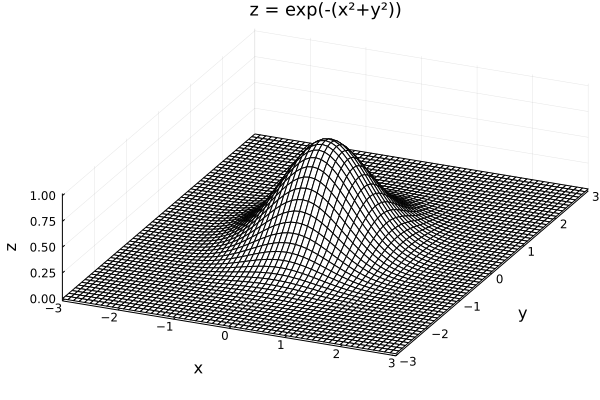

In [2]:
x = y = range(-3, 3, 61)
wireframe(x, y, (x, y) -> exp(-(x^2+y^2)); camera=(30, 70), colorbar=false)
plot!(; zlim=(-0.02, 1.02), size=(600, 400))
plot!(; xlabel="x", ylabel="y", zlabel="z")
title!("z = exp(-(x²+y²))"; titlefontsize=12)

この山は $z$ 軸 $x = y = 0$ を中心にして回転対称である.  次のグラフは横軸を半径 $r = \sqrt{x^2+y^2}$ とした場合のこの山の高さのグラフである.

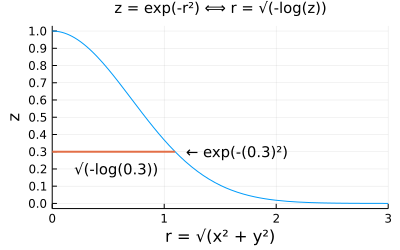

In [3]:
plot(r -> exp(-r^2), 0, 3; label="", title="z = exp(-r²) ⟺ r = √(-log(z))")
plot!(; xlabel="r = √(x² + y²)", ylabel="z")
plot!(; ytick=0:0.1:1)
z = 0.3
plot!([(0, z), (√(-log(z)), z)]; label="", lw=2)
plot!(; xlim=(0, 3))
annotate!(0.2, 0.2, ("√(-log(0.3))", 10, :left))
annotate!(1.2, 0.3, ("← exp(-(0.3)²)", 10, :left))

この図より, 高さ $0 < z \le 1$ での山の切断面は, 半径 $\sqrt{-\log z}$ の円盤になる.  その円盤の面積 $\pi(-\log z)$ を $0 < z \le 1$ について積分すれば上の山の体積(= Gauss積分の2乗 $I^2$ の値)が得られる:

$$
I^2 = \int_0^1 \pi(-\log z)\, dz = -\pi[z\log z - z]_0^1 = -\pi(-1) = \pi.
$$

ゆえに

$$
I = \int_{-\infty}^\infty e^{-x^2}\,dx = \sqrt{\pi}.
$$

### 問題: 正規分布での確率の総和

$\mu, \sigma\in\R$, $\sigma > 0$ であると仮定する. 次を示せ:

$$
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)\,dx = 1.
$$

__解答例:__ 左辺の積分部分が $\sqrt{2\pi\sigma^2}$ に等しいことを示せばよい.

$$
\begin{aligned}
\int_{-\infty}^\infty \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)\,dx =
\int_{-\infty}^\infty \exp\left(-\frac{y^2}{2\sigma^2}\right)\,dy =
\sqrt{2\sigma^2}\int_{-\infty}^\infty e^{-z^2}\,dz = 
\sqrt{2\sigma^2}\sqrt{\pi} =
\sqrt{2\pi\sigma^2}
\end{aligned}
$$

最初の等号で $x = y+\mu$ とおき, 2つめの等号で $y = \sqrt{2\sigma^2}\, z$ とおき, 3つめの等号でGauss積分を使った.

__解答終__

### 正規分布の定義

$\mu, \sigma\in\R$, $\sigma > 0$ であると仮定する. 

次の確率密度函数によって定義される連続分布を平均 $\mu$, 分散 $\sigma^2$ (もしくは標準偏差 $\sigma$)の __正規分布__ (normal distribution)と呼び $\op{Normal}(\mu, \sigma)$ と表す:

$$
p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
$$

特に $\mu=0$, $\sigma=1$ の正規分布を __標準正規分布__ (standard normal distribution)と呼び, $\op{Normal}()$ と表すことにする:

$$
p(x|0,1) = \frac{1}{\sqrt{2\pi}}e^{-x^2}.
$$

### $p(x|\theta)$ という記号法について

パラメータ $\theta$ を持つ $x$ に関する確率密度函数を $p(x|\theta)$ と書く.

この記号法によって, 縦棒 $|$ の左側の変数 $x$ について確率密度函数になっているが,  縦棒 $|$ の右側の変数 $\theta$ については単なる函数で確率密度函数ではないことを表す.

パラメータ $\theta$ を持つ $x$ に関する確率質量函数 $P(x|\theta)$ についても同様である.

### 問題: Gauss積分の拡張とガンマ函数の関係

$\alpha\in\R$, $\alpha > 0$ であると仮定する. 次を示せ:

$$
\int_{-\infty}^\infty e^{-x^2} |x|^{2\alpha - 1} \,dx =
\int_0^\infty e^{-y} y^{\alpha - 1}\,dy
$$

__解答例:__ $x = \sqrt{y}$ とおくと, $dx/x = d\log x = (1/2)d\log y = dy/(2y)$ なので,

$$
\int_{-\infty}^\infty e^{-x^2} |x|^{2\alpha - 1} \,dx =
2\int_0^\infty e^{-x^2} x^{2\alpha} \,\frac{dx}{x} =
2\int_0^\infty e^{-y} y^\alpha \,\frac{dy}{2y} =
\int_0^\infty e^{-y} y^{\alpha-1} \,dy.
$$

最初の等号で被積分函数が偶函数であることを用い, 第2の等号で $x = \sqrt{y}$ とおいた.

__解答終__

この問題では単なる $\exp(-x^2)$ の積分であるGauss積分をそれに $|x|$ のべきをかけたものの積分に拡張した.  実はこの拡張は次の節で扱うガンマ函数の定義そのものになっている.  すなわち, ガンマ函数はGauss積分の拡張の一種になっている.

正規分布の確率密度函数は釣鐘型(bell-shaped)になる.

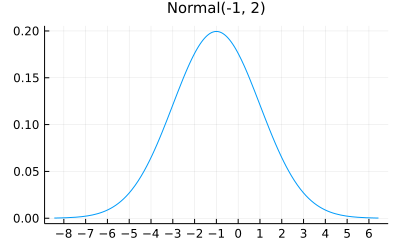

In [4]:
plot(Normal(-1, 2); label="", title="Normal(-1, 2)", xtick = -100:100)

## ガンマ函数

### ガンマ函数の定義

$\alpha > 0$ について, ガンマ函数 $\Gamma(\alpha)$ を次のように定義する:

$$
\Gamma(\alpha) = \int_0^\infty e^{-x} x^{\alpha - 1}\,dx.
$$

前節の問題の結果より, これは

$$
\Gamma(\alpha) = \int_{-\infty}^\infty e^{-x^2} |x|^{2\alpha - 1} \,dx
$$

とGauss積分の拡張形でも表される. 特に

$$
\Gamma(1/2) = \int_{-\infty}^\infty e^{-x^2}\,dx = \sqrt{\pi}.
$$

このようにガンマ函数 $\Gamma(\alpha)$ はGauss積分 $\Gamma(1/2)$ の拡張になっている. 

$\Gamma(1) = 1$ となることも容易に示せる:

$$
\Gamma(1) = \int_0^\infty e^{-x}\,dx = [-e^{-x}]_0^\infty = -(-1) = 1.
$$

__注意:__ Gauss積分は正規分布の定義の基礎になっている. ここで扱っているようなGauss積分の拡張形は平均が0の正規分布の絶対モーメントになっており, 正規分布に関係した計算には自然にガンマ函数が出て来る.

### 問題: ガンマ函数はこの形でよく使われる

$\alpha, \theta > 0$ について次の公式が成立することを示せ:

$$
\int_0^\infty e^{-x/\theta} x^{\alpha - 1}\,dx = \theta^\alpha \Gamma(\alpha).
$$

__解答例:__ $x = \theta y$ とおくと, $dx/x = \theta\,dy/(\theta y) = dy/y$ なので,

$$
\int_0^\infty e^{-x/\theta} x^{\alpha - 1}\,dx =
\int_0^\infty e^{-x/\theta} x^\alpha \,\frac{dx}{x} =
\int_0^\infty e^{-y} (\theta y)^\alpha \,\frac{dy}{y} =
\theta^\alpha \int_0^\infty e^{-y} y^{\alpha - 1} \,dy =
\theta^\alpha \Gamma(\alpha).
$$

2つめの等号で $x = \theta y$ を代入して, 4つめの等号でガンマ函数の定義を使った.

__解答終__

__ガンマ函数は主にこの形で使う__ と覚えておくと便利だと思う.

例えば, この問題の結果から,

$$
\int_0^\infty \frac{e^{-x/\theta} x^{\alpha - 1}}{\theta^\alpha \Gamma(\alpha)} \,dx = 1
$$

という公式が得られる.  これは「ガンマ分布において確率の総和が1になる」という意味を持つ.

### ガンマ分布の定義

$\alpha, \theta > 0$ であると仮定する. 

次の確率密度函数によって定義される連続分布を__形状パラメータ__ $\alpha$, __スケールパラメータ__ $\theta$ の __ガンマ分布__ (Gamma distribution)と呼び $\op{Gamma}(\alpha, \theta)$ と表す:

$$
p(x|\alpha,\theta) = \frac{1}{\theta^\alpha \Gamma(\alpha)} e^{-x/\theta} x^{\alpha - 1}
\quad (x > 0).
$$

ガンマ分布は正規分布から派生して出て来る分布の中で非常に基本的なものになっている.

負の二項分布の連続極限としてガンマ分布を出すことによって, ガンマ分布には「1回起こるまでにかかる時間の期待値が $\theta$ であるようなイベントが $\alpha$ 回起こるまでにかかる時間の分布」だと解釈できる.  この点については後で別のノートで説明する.

スケールパラメータを変えてもガンマ分布の確率密度函数 $p(x|\alpha,\theta)$ のグラフの形状は変化せず, 単に $x$ 軸方向のスケールが変わって, 密度の値もそれに応じてスケールされるだけになる.  ゆえに, ガンマ分布の形状を知りたければ, 形状パラメータ $\alpha$ のみを動かして, ガンマ分布のグラフを描けばよい.

$\alpha = 1/2$ のガンマ分布の確率密度函数は次の形になる.

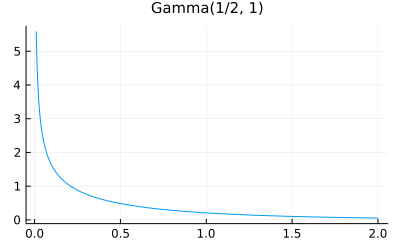

In [5]:
plot(Gamma(1/2, 1), 0.01, 2; label="", title="Gamma(1/2, 1)")

$\alpha = 3$ のガンマ分布の確率密度函数は次の形になる.

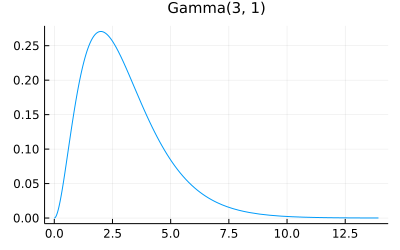

In [6]:
plot(Gamma(3, 1); label="", title="Gamma(3, 1)")

$\alpha = 30$ のガンマ分布の確率密度函数は次の形になる.

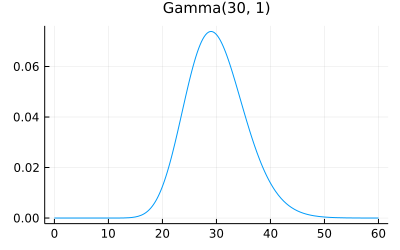

In [7]:
plot(Gamma(30, 1), 0, 60; label="", title="Gamma(30, 1)")

__形状パラメータ $\alpha$ が大きなガンマ分布は正規分布で近似される.__ 

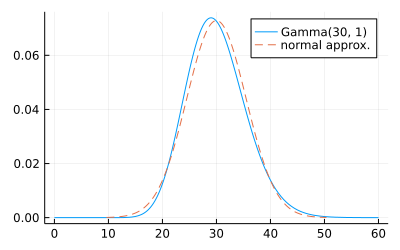

In [8]:
gam = Gamma(30, 1)
plot(gam, 0, 60; label="Gamma(30, 1)")
plot!(Normal(mean(gam), std(gam)); label="normal approx.", ls=:dash)

ガンマ分布の確率密度函数は $(\alpha - 1)\theta$ で最大になることを示せる. それに対して, それを近似する正規分布の期待値はもとのガンマ分布の期待値 $\alpha\theta$ に等しくなるので, $\alpha = 30$, $\theta = 1$ の場合にはその分だけずれが生じている.

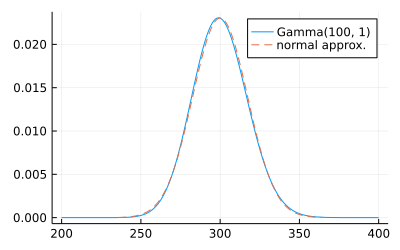

In [9]:
gam = Gamma(300, 1)
plot(gam, 200, 400; label="Gamma(100, 1)")
plot!(Normal(mean(gam), std(gam)); label="normal approx.", ls=:dash)

__注意:__ 形状パラメータ $\alpha$ が大きなガンマ分布は正規分布でよく近似されることは本質的に階乗に関するStirlingの(近似)公式に同等である.  

### 問題: ガンマ分布の期待値と分散

分布 $\op{Gamma}(\alpha, \theta)$ の期待値と分散がそれぞれ $\alpha\theta$, $\alpha\theta^2$ となることを示せ.

__解答例:__ $X\sim\op{Gamma}(\alpha, \theta)$ と仮定する. $k = 0,1,2,\ldots$ について

$$
\begin{aligned}
\Gamma(\alpha+k) &=
(\alpha+k-1)\Gamma(\alpha+k-1) = \cdots =
(\alpha+k-1)\cdots(\alpha+1)\alpha\Gamma(\alpha) \\ &=
\alpha(\alpha+1)\cdots(\alpha+k-1)\Gamma(\alpha)
\end{aligned}
$$

なので

$$
E[X^k] =
\frac{1}{\theta^\alpha \Gamma(\alpha)}
\int_0^\infty e^{-x/\theta} x^{\alpha + k - 1}\,dx =
\frac{\theta^{\alpha+k} \Gamma(\alpha+k)}{\theta^\alpha \Gamma(\alpha)} =
\theta^k \alpha(\alpha+1)\cdots(\alpha+k-1).
$$

ゆえに,

$$
E[X] = \theta\alpha = \alpha\theta, \quad
\op{var}(X) = E[X^2] - E[X]^2 = \theta^2\alpha(\alpha+1)-\theta^2\alpha^2 =
\theta^2\alpha = \alpha\theta^2.
$$

__解答終__

### 指数分布の定義

$\alpha = 1$ のガンマ分布の密度函数は

$$
p(x|1,\theta) = \frac{1}{\theta} e^{-x/\theta} \quad (x > 0)
$$

の形になる.  この形の確率密度函数で定義される連続確率分布を __指数分布__ (exponential distribution)と呼び, $\op{Exponential}(\theta)$ と表す:

$$
\op{Exponential}(\theta) = \op{Gamma}(1, \theta).
$$

ガンマ分布の期待値と分散に関する結果より, 指数分布の期待値と分散はそれぞれ $\theta$, $\theta^2$ になる.

指数分布は「1回起こるまでにかかる時間の期待値が $\theta$ であるようなイベントが起こるまでにかかる時間の分布」だと解釈可能である.  この点については後で別のノートで説明する.

家計が保有する金融資産の分布は指数分布に近い形の分布になる.

指数分布の確率密度函数は次の形になる.

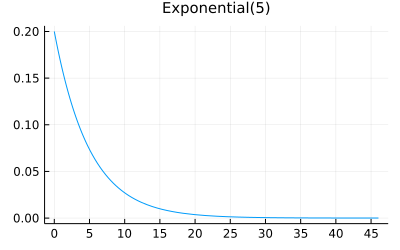

In [10]:
plot(Exponential(5); label="", title="Exponential(5)", xtick=0:5:100)

### χ²分布の定義

指数分布はガンマ分布 $\Gamma(\alpha, \theta)$ の形状パラメータ $\alpha$ を $\alpha=1$ に固定して得られる分布であった.

__χ²分布__ は本質的にガンマ分布  $\Gamma(\alpha, \theta)$ のスケールパラメータ $\theta$ を $\theta=2$ に固定して得られる分布のことである.  ただし, $\alpha=\nu/2$ とおいて, $\nu$ を __自由度__ (degree of freedom, df)と呼ぶ.  すなわち, 分布 $\op{Gamma}(\nu/2, 2)$ を自由度 $\nu$ の __χ²分布__ (カイ二乗分布, chi-squared distribution)と呼び,

$$
\op{Chisq}(\nu) = \op{Gamma}(\nu/2, 2)
$$

と表す.  χ²分布の確率密度函数は次の形になる:

$$
p(x|\nu) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} e^{x/2} x^{\nu/2 - 1} \quad (x > 0)
$$

ガンマ分布の期待値と分散に関する結果より, 指数分布の期待値と分散はそれぞれ $\nu$, $2\nu$ になる.

ガンマ分布は $\alpha$ が大きなとき正規分布で近似されるので, __自由度 $\nu$ が大きなχ²分布は正規分布で近似される.__

In [11]:
p_chisq(ν, x) = (ν > 2 || x ≥ 0 || x ≤ -0.1) ? pdf(Chisq(ν), x) : NaN
function plot_chisq_normal(ν; kwargs...)
    x = range(ν - 5√(2ν), ν + 5√(2ν), 1000)
    P1 = plot(x, x -> p_chisq(ν, x); label="Chisq(ν)", kwargs...)
    plot!(x, x -> pdf(Normal(ν, √(2ν)), x); label="Normal(ν,√(2ν))", ls=:dash)
    title!("ν = $ν")
end

plot_chisq_normal (generic function with 1 method)

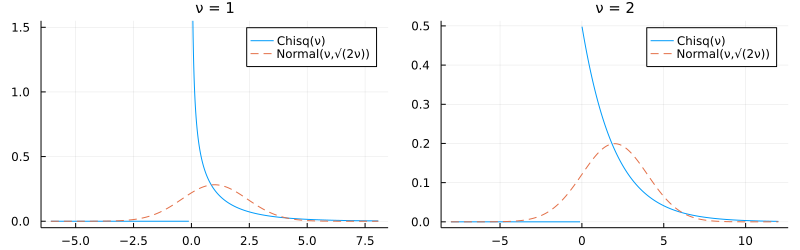

In [12]:
plot(plot_chisq_normal(1; ylim=(-0.05, 1.55)), plot_chisq_normal(2); size=(800, 250))

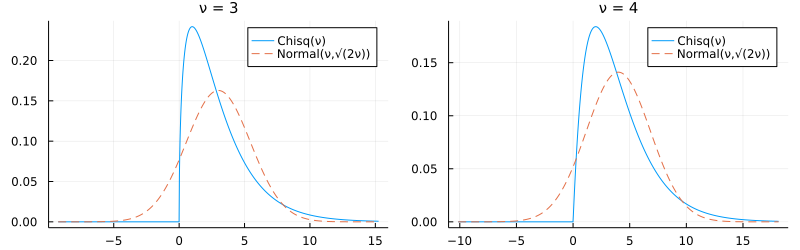

In [13]:
plot(plot_chisq_normal(3), plot_chisq_normal(4); size=(800, 250))

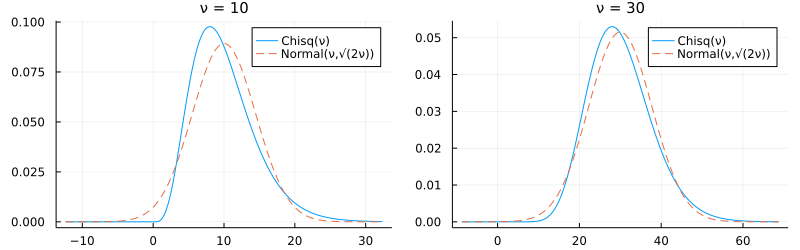

In [14]:
plot(plot_chisq_normal(10), plot_chisq_normal(30); size=(800, 250))

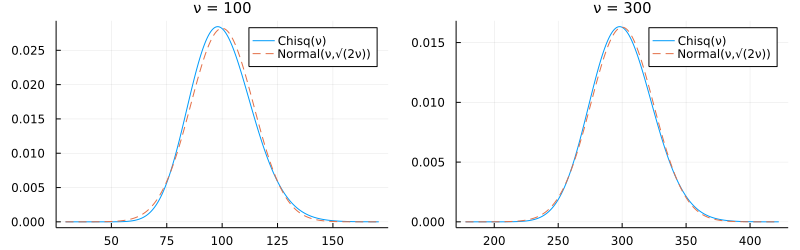

In [15]:
plot(plot_chisq_normal(100), plot_chisq_normal(300); size=(800, 250))

### χ²分布と正規分布の関係

$\nu$ が正の整数のとき, カイ二乗分布は標準正規分布に従う独立な $\nu$ 個の確率変数達の和が従う分布になっている. より一般に, $(X_1,\ldots,X_\nu)$ が確率密度函数が

$$
p(x_1,\ldots,x_n) = \text{const.} \exp\left(-\frac{1}{2}\sum_{i,j=1}^\nu a_{ij} x_i x_j\right)
$$

の形の多変量正規分布に従うときに, 

$$
X^2 = \sum_{i,j=1}^\nu a_{ij} X_i X_j
$$

の従う分布は自由度 $\nu$ のχ²分布になる. このようにχ²分布は正規分布と直接的に関係した分布になっている.  $X_1,\ldots,X_\nu$ は各々が標準正規分布に従う独立な確率変数達であることは, それらの同時確率密度函数が

$$
p(x_1,\ldots,x_\nu) = \frac{1}{(2\pi)^{\nu/2}} \exp\left(-\frac{1}{2}(x_1^2 + \cdots + x_\nu^2)\right)
$$

となることと同値なので, この場合には上で述べたように $X^2 = X_1^2 + \cdots + X_\nu^2$ が従う分布が自由度 $\nu$ のχ²分布になる.  χ²分布の自由度は「独立な正規分布が何個あるか」を意味していると考えられる.

### 問題: 自由度 $n$ χ²分布の $n$ 個の標準正規分布による表示

確率変数達 $X_1,\ldots,X_n$ は同時確率密度函数

$$
p(x_1,\ldots,x_n) = \frac{1}{(2\pi)^{n/2}} \exp\left(-\frac{1}{2}(x_1^2 + \cdots + x_n^2)\right)
$$

を持つと仮定する. すなわち,

$$
E[f(X_1,\ldots,X_n)] =
\int\!\!\cdots\!\!\int_{\R^n} f(x_1,\ldots,x_n)p(x_1,\ldots,x_n)\,dx_1\cdots x_n
$$

が成立していると仮定する. このとき, 確率変数 $X^2$ を

$$
Y = X_1^2 + \cdots + X_n^2
$$

とおくと, $Y$ は自由度 $n$ のχ²分布に従うことを示せ.  すなわち,

$$
E[f(Y)] = \frac{1}{2^{n/2}\Gamma(n/2)} \int_0^\infty f(y) e^{y/2} y^{n/2 - 1}\,dy
$$

となることを示せ.

__解答例:__

__解答終__

### ガンマ函数の函数等式

ガンマ函数の函数等式

$$
\Gamma(\alpha + 1) = \alpha\Gamma(\alpha) \quad (\alpha > 0)
$$

を示そう.  $(-e^{-x})'= e^{-x}$ に関する部分積分を行うと,

$$
\begin{aligned}
\Gamma(\alpha + 1) &= 
\int_0^\infty e^{-x} x^\alpha\,dx =
\int_0^\infty (-e^{-x})' x^\alpha\,dx 
\\ &=
[-e^{-x} x^\alpha]_0^\infty + \int_0^\infty e^{-x} \alpha x^{\alpha - 1}\,dx =
\alpha \int_0^\infty e^{-x} x^{\alpha - 1}\,dx =
\alpha \Gamma(\alpha).
\end{aligned}
$$

3つめの等号で部分積分を行った. 4つめの等号では $\alpha > 0$ より $\lim_{x\searrow 0}x^\alpha = 0$ となることと, $\lim_{x\to\infty} e^{-x} x^\alpha = 0$ となることを使った. 最初と最後の等号でガンマ函数の定義を使った.

ガンマ函数の函数等式より, $k = 0,1,2,\ldots$ について,

$$
\Gamma(\alpha+k) = (\alpha+k-1)\Gamma(\alpha+k-1) =
\cdots = (\alpha+k-1)\cdots(\alpha+2)\alpha\Gamma(\alpha)
$$

なので

$$
\frac{\Gamma(\alpha+k)}{\Gamma(\alpha)} = \alpha(\alpha+k-1)\cdots(\alpha+k-1).
$$

ガンマ函数の函数等式はこの形で使われることがよくある.

### 階乗のガンマ函数表示

ガンマ函数の函数等式と易しく証明できる $\Gamma(1)=1$ から,

$$
\Gamma(n + 1) = n! \quad (n = 0,1,2,\ldots)
$$

となることを示せる.  実際, $n$ が $0$ 以上の整数のとき,

$$
\Gamma(n + 1) =
n\Gamma(n) =
n(n-1)\Gamma(n-1) =
\cdots = 
n(n-1)\cdots 2\cdot 1\,\Gamma(1) =
n!.
$$

ガンマ函数の函数等式を $n$ 回使い, 最後に $\Gamma(1)=1$ を使った.

### 問題: 正の半整数でのガンマ函数の値

次を示せ:

$$
\Gamma\left(\frac{2n+1}{2}\right) =
\frac{1\cdot 3\cdots(2n-1)}{2^n} \sqrt{\pi} =
\frac{(2n)!}{2^{2n}n!} \sqrt{\pi}
\quad (n = 0,1,2,\ldots)
$$

__解答例:__ $n$ が0以上の整数であるとき,

$$
\begin{aligned}
\Gamma\left(\frac{2n+1}{2}\right) &=
\frac{2n-1}{2} \Gamma\left(\frac{2n-1}{2}\right) =
\frac{2n-1}{2} \frac{2n-3}{2} \Gamma\left(\frac{2n-3}{2}\right) =
\cdots
\\ & =
\frac{2n-1}{2} \frac{2n-3}{2} \cdots \frac{3}{2} \frac{1}{2}\Gamma\left(\frac{1}{2}\right) =
\frac{1\cdot 3\cdots(2n-1)}{2^n} \sqrt{\pi}.
\end{aligned}
$$

ガンマ函数の函数等式を $n$ 回使い, 最後にGauss積分 $\Gamma(1/2)=\sqrt{\pi}$ を使った.

さらに, 分子分母に $2\cdot4\cdots(2n) = 2^n n!$ をかけることによって,

$$
\Gamma\left(\frac{2n+1}{2}\right) =
\frac{1\cdot 3\cdots(2n-1)}{2^n} \sqrt{\pi} = 
\frac{1\cdot 3\cdots(2n-1)}{2^n} \frac{2\cdot4\cdots(2n)}{2^n n!} \sqrt{\pi} =
\frac{(2n)!}{2^{2n}n!} \sqrt{\pi}.
$$

__解答終__

### 問題: 標準正規分布の偶数次のモーメント

次を示せ:

$$
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{-x^2/2} x^{2n}\,dx =
\frac{2^n}{\sqrt{\pi}} \Gamma\left(\frac{2n+1}{2}\right) =
\frac{(2n)!}{2^n\,n!} =
1\cdot 3\cdots(2n-1)
\quad (n = 0,1,2,\ldots)
$$

__解答例:__ 被積分函数が偶函数であることを使ってから, $x = \sqrt{y}$ とおくと $dx = y^{-1/2}\,dy/2$ となることより, 

$$
\begin{aligned}
&
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty e^{-x^2/2} x^{2n}\,dx =
\frac{2}{\sqrt{2\pi}} \int_0^\infty e^{-x^2/2} x^{2n}\,dx =
\frac{1}{\sqrt{2\pi}} \int_0^\infty e^{-y/2} y^{n-1/2}\,dy 
\\ & \quad =
\frac{1}{\sqrt{2\pi}} \int_0^\infty e^{-y/2} y^{(2n+1)/2 - 1}\,dy =
\frac{1}{\sqrt{2\pi}} 2^{(2n+1)/2} \Gamma\left(\frac{2n+1}{2}\right)
\\ & \quad =
\frac{2^n}{\sqrt{\pi}} \Gamma\left(\frac{2n+1}{2}\right) =
\frac{(2n)!}{2^n\,n!} =
1\cdot 3\cdots(2n-1).
\end{aligned}
$$

最後から4つめの等号でガンマ函数のよく使われる形 $\int_0^\infty e^{-x/\theta} x^{\alpha - 1}\,dx = \theta^\alpha \Gamma(\alpha)$ を使い, 終わりの2つの等号で正の半整数でのガンマ函数の値を使った.

__解答終__

__注意:__ 一般に確率変数 $X$ について $E[X^k]$ ($k=0,1,2,\ldots$) を $X$ もしくは $X$ が従う分布の __モーメント__ (積率, moment)と呼ぶ.  上の結果は標準正規分布に従う確率変数 $X$ のモーメントについて,

$$
E[X^{2n}] =
\frac{(2n)!}{2^n\,n!} =
1\cdot 3\cdots(2n-1)
\quad (n = 0,1,2,\ldots)
$$

が成立することを意味している.  $x^{2n+1}$ は奇函数になるので $E[X^{2n+1}] = 0$ となる.

### 問題: 標準正規分布のモーメント母函数とキュムラント母函数

確率変数 $X$ について $E[e^{tX}]$ と $\log E[e^{tX}]$ をそれぞれ $X$ の __モーメント母函数__ (moment generating function, mgf)と __キュムラント母函数__ (cumulant generating function, cgf)と呼ぶ.  

標準正規分布に従う確率変数 $X$ のときのモーメント母函数とキュムラント母函数がそれぞれ次のようになることを示せ:

$$
E[e^{tX}] = e^{t^2/2}, \quad \log E[e^{tX}] = \frac{t^2}{2}.
$$

__注意:__ 標準正規分布のキュムラント母函数がこのようなシンプルな形になることは, 中心極限定理(正規分布による普遍的な近似定理)や正規分布で近似したときの誤差の見積もりなどで使われる.

__解答例1__ 1つ前の問題の結果を使うと,

$$
E[e^{tX}] =
\sum_{n=0}^\infty \frac{t^{2n} E[X^{2n}]}{(2n)!} =
\sum_{n=0}^\infty \frac{t^{2n}}{(2n)!} \frac{(2n)!}{2^n\,n!} =
\sum_{n=0}^\infty \frac{(t^2/2)^n}{n!} =
e^{t^2/2}, \quad
\log E[e^{tX}] = \frac{t^2}{2}.
$$

__解答終__

__解答例2:__ $tx - x^2/2 = t^2/2 -(x-t)^2/2$ であることより,

$$
E[e^{tX}] =
\int_{-\infty}^\infty e^{tx}\frac{e^{-x^2/2}}{\sqrt{2\pi}}\,dx =
e^{t^2/2}\int_{-\infty}^\infty \frac{e^{-(x-t)^2/2}}{\sqrt{2\pi}}\,dx = 
e^{t^2/2},\quad
\log E[e^{tX}] = \frac{t^2}{2}.
$$

__解答終__

### 問題: n-1次元単位球面の面積のガンマ函数表示

$n-1$ 次元単位球面 $S^{n-1}$ を

$$
S^{n-1} = \{\, (x_1,\ldots,x_n)\in\R^n \mid x_1^2 + \cdots + x_n^2 = 1 \,\}
$$

と定める(Sはsphereの頭文字). 例えば, $S^1$ は平面上の半径が $1$ の円周(曲線なので1次元の図形)になり, $S^2$ は3次元空間上の半径が $1$ の球面(曲面なので2次元の図形)になる. $S^{n-1}$ の面積を $A_{n-1}$ がガンマ函数によって次のように表されることを示せ:

$$
A_{n-1} = \frac{2\pi^{n/2}}{\Gamma(n/2)}.
$$

__解答例:__ Gauss積分の $n$ 乗

$$
I^n = \int_{-\infty}^\infty\cdots\int_{-\infty}^\infty e^{-(x_1^2+\cdots+x_n^2)}\,dx_1\cdots dx_n
$$

を二通りに計算することによって, $n-1$ 次元単位球面 $S^{n-1}$ の面積 $A_{n-1}$ を求めよう. まず, これがGauss積分の $n$ 乗であることから, 

$$
I^n = \left(\int_{-\infty}^\infty e^{-x^2}\,dx\right)^2 = (\sqrt{\pi})^2 = \pi^{n/2}.
$$

$n-1$ 次元球面上の微小領域の面積を $d\omega$ と書くと, 半径 $r$ の $n-1$ 次元球面上の対応する微小領域の面積はその $r^{n-1}$ 倍の $r^{n-1}\,d\omega$ になり, さらにそれに $dr$ の厚みを持たせて作られる $n$ 次元の微小領域の体積はほぼそれらの積 $r^{n-1}\,dr\,d\omega$ に等しくなる.  $y = r^2 = x_1^2 + \cdots + x_n^2$ とおくと, $dr = d\sqrt{y} = y^{-1/2}\,dy/2$ なので, 

$$
r^{n-1}\,dr\,d\omega =
\frac{1}{2}y^{(n-1)/2-1/2}\,dy\,d\omega =
\frac{1}{2}y^{n/2-1}\,dy\,d\omega.
$$

$dx_1\cdots dx_n$ に関する積分は $\frac{1}{2}y^{n/2-1}\,dy\,d\omega$ に関する積分に書き換えられるので,

$$
\pi^{n/2} = I^n =
\int_{S^{n-1}}\left(\int_0^\infty e^{-y} \frac{1}{2}y^{n/2-1}\,dy\right)d\omega =
\frac{A_{n-1}}{2}\int_0^\infty e^{-y} y^{n/2-1}\,dy =
\frac{A_{n-1}}{2}\Gamma(n/2).
$$

すなわち, $A_{n-1} = 2\pi^{n/2}/\Gamma(n/2)$.

__解答終__

__注意:__ 半径 $r$ の $n-1$ 次元球面の面積は単位球面の面積の $r^{n-1}$ 倍になるので

$$
A_{n-1}r^{n-1} = \frac{2\pi^{n/2}}{\Gamma(n/2)} r^{n-1}
$$

になる.  例えば,

$$
\Gamma(1/2) = \sqrt{\pi}, \quad
\Gamma(1) = 1, \quad
\Gamma(3/2) = \frac{1}{2}\sqrt{\pi}, \quad
\Gamma(2) = 1, \quad
\Gamma(5/2) = \frac{3}{4}\sqrt{\pi}
$$

なので,

$$
\begin{aligned}
&
A_0 = \frac{2\pi^{1/2}}{\Gamma(1/2)} = 2, \quad
A_1 r = \frac{2\pi^{2/2}}{\Gamma(2/2)} r = 2\pi r, \quad
A_2 r^2 = \frac{2\pi^{3/2}}{\Gamma(3/2)} r^2 = 4\pi r^2,
\\ &
A_3 r^3 = \frac{2\pi^{4/2}}{\Gamma(4/2)} r^3 = 2\pi^2 r^3, \quad
A_4 r^4 = \frac{2\pi^{5/2}}{\Gamma(5/2)} r^4 = \frac{8\pi^2 r^4}{3}.
\end{aligned}
$$

$2$ は集合 $S^0 = \{-1, 1\}$ の点の個数である.  $2\pi r$ や $4\pi r^2$ は高校生にとってもおなじみの公式である.

### $n-1$ 次元単位球面上の座標を使った面積の計算

上の問題の解答例中で単位球面上の自然な積分を $\int_{S^{n-1}}\cdots d\omega$ と書いた. その解答例のポイントは単位球面上の積分の具体的な座標表示を使わずに, そのように抽象的に書いたまま計算が最後まで遂行できることである.

しかし, 具体的に座標で表示しても同じ結果が得られるかどうがについて疑問に思った人もいるのではないだろうか?

そのような人のために以下では $n-1$ 次元単位球面上の座標を具体的に与えて面積を計算し直してみよう.

$n-1$ 次元球面

$$
S^{n-1} = \{\, (x_1,\ldots,x_n)\in\R^n \mid x_1^2 + \cdots + x_n^2 = 1 \,\}
$$

の上の点は次のようにパラメトライズできる:

$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\vdots \\
x_n \\
\end{bmatrix} =
\left[
\begin{array}{r}
\cos\theta_1 \cos\theta_2 \cos\theta_3 \cdots \cos\theta_{n-1} \\
\sin\theta_1 \cos\theta_2 \cos\theta_3 \cdots \cos\theta_{n-1} \\
\sin\theta_2 \cos\theta_3 \cdots \cos\theta_{n-1} \\
\sin\theta_3 \cdots \cos\theta_{n-1}\\
\ddots \;\quad \vdots \quad \\
\sin\theta_{n-1}
\end{array}
\right]
\qquad
\left(
\begin{array}{l}
-\pi\le\theta_1\le\pi, \\
-\frac{\pi}{2}\le\theta_2,\ldots,\theta_{n-1}\le\frac{\pi}{2}
\end{array}
\right)
$$

これは次のような手続きで得られる:

1. $(x_1,x_2)$ 平面上の単位円周を $(x_1,x_2) = (\cos\theta_1,\sin\theta_1)$ とパラメトライズする.
2. $(x_1,x_2)$ 上の単位円周上の点を角度 $\theta_2$ で $x_3$ 軸方向に持ち上げることによって, $(x_1,x_2,x_3)$ 空間内の単位球面をパラメトライズする.
3. $(x_1,x_2,x_3)$ 内の単位球面の点を角度 $\theta_3$ で $x_4$ 軸方向に持ち上げることによって, $(x_1,x_2,x_3,x_4)$ 空間内の単位球面をパラメトライズする.
4. 以下これを繰り返す.

これによって, 単位球面上の面積は以下のようにして計算できることがわかる.

1. $(x_1,x_2)$ 平面上の単位円周上の弧の長さは $d\omega_1 = d\theta_1 = \cos^0\theta_1 \,d\theta_1$ の積分で計算できる.
2. $(x_1,x_2,x_3)$ 空間内の単位球面上の面積は $d\omega_1$ を $\cos\theta_2$ 倍に縮小した結果と $d\theta_2$ の積である $d\omega_2 = \cos^0\theta_1 \cos^2\theta_2 \,d\theta_1\,d\theta_2$ を積分すれば計算できる.
3. $(x_1,x_2,x_3,x_4)$ 空間内の単位球面上の面積は $d\omega_2$ が2次元の面積要素なのでそれを $\cos\theta_2$ の2乗倍した結果と $d\theta_3$ の積である $d\omega_2 = \cos^0\theta_1 \cos^1\theta_2 \cos^2\theta_3 \,d\theta_1\,d\theta_2\,d\theta_3$ を積分すれば計算できる.
4. 以下これを繰り返す.

ゆえに, $n-1$ 次元単位球面 $S^{n-1}$ 上の領域の面積は

$$
d\omega_{n-1} =
\cos^0\theta_1 \cos^1\theta_2 \cos^2\theta_3 \cdots \cos^{n-2}\theta_{n-1}
\,d\theta_1\,d\theta_2\,d\theta_3\cdots d\theta_{n-1}
$$

を積分すれば計算できる. 特に $S^{n-1}$ の面積 $A_{n-1}$ は以下のように表される:

$$
A_{n-1} = 2\prod_{k=1}^{n-1}\int_{-\pi/2}^{\pi/2} \cos^{k-1}\theta_k\,d\theta_k.
$$

$\theta_1$ に関する $-\pi$ から $\pi$ までの積分を $-\pi/2$ から $\pi/2$ までの積分に変更し, その代わりに $2$ 倍してつじつまを合わせたことに注意せよ. ($S^0$ が2点集合であることを思い出せばこれは自然な処理であることがわかる.)

後で示すベータ函数の三角函数による表示とベータ函数をガンマ函数で表す公式

$$
2\int_0^{\pi/2} (\cos\theta)^{2\alpha-1}(\sin\theta)^{2\beta-1}\,d\theta =
B(\alpha, \beta) =
\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha, \beta)}
$$

と $\Gamma(1/2)=\sqrt{\pi}$ を使うと,

$$
\int_{-\pi/2}^{\pi/2} \cos^k\theta\,d\theta =
2\int_0^{\pi/2} \cos^{k-1}\theta\,d\theta =
B(k/2, 1/2) =
\frac{\Gamma(k/2)\sqrt{\pi}}{\Gamma((k+1)/2)}.
$$

ゆえに

$$
A_{n-1} = 2
\frac{\sqrt{\pi}\,\sqrt{\pi}}{\Gamma(2/2)}
\frac{\Gamma(2/2)\sqrt{\pi}}{\Gamma(3/2)}
\frac{\Gamma(3/2)\sqrt{\pi}}{\Gamma(4/2)}
\cdots
\frac{\Gamma((n-1)/2)\sqrt{\pi}}{\Gamma(n/2)} =
\frac{2\pi^{n/2}}{\Gamma(n/2)}.
$$

上の問題と同じ結果が得られた.

### 問題: n次元単位球体の面積のガンマ函数表示

$n$ 次元単位球体 $B^n$ を

$$
B^n = \{\, (x_1,\ldots,x_n)\in\R^n \mid x_1^2 + \cdots + x_n^2 \le 1 \,\}
$$

と定める(Bはballの頭文字). 例えば, $B^1$ は直線上の線分 $[-1, 1]$ になり, $B^2$ は2次元平面上の半径が $1$ の円盤になり, $B^3$ は3次元空間内の半径 $1$ の単位球体になる. $B^n$ の体積を $V_n$ がガンマ函数によって次のように表されることを示せ:

$$
V_n = \frac{\pi^{n/2}}{\Gamma(n/2 + 1)}.
$$

__解答例:__ 半径 $r$ の $n-1$ 次元球面の面積

$$
A_{n-1}r^{n-1} = \frac{2\pi^{n/2}}{\Gamma(n/2)} r^{n-1}
$$

を $r$ について $0$ から $1$ まで積分すれば, $n$ 次元単位球体の体積が得られる:

$$
V_n = \int_0^1 A_{n-1}r^{n-1}\,dr = \frac{A_{n-1}}{n} =
\frac{2\pi^{n/2}}{n\Gamma(n/2)} = 
\frac{\pi^{n/2}}{(n/2)\Gamma(n/2)} = 
\frac{\pi^{n/2}}{\Gamma(n/2 + 1)}.
$$

最後の等号でガンマ函数の函数等式を使った.

__解答終__

__注意:__ この問題の大幅な一般化と解答を19世紀にDirichlet氏が与えている. このノートのずっと下の方で紹介されているDirichlet積分=多変数ベータ函数の解説を参照せよ.

__注意:__ 半径 $r$ の $n$ 次元球体の体積は単位球体の体積の $r^n$ 倍になるので

$$
V_n r^n = \frac{\pi^{n/2}}{\Gamma(n/2+1)} r^n
$$

になる.  例えば,

$$
\Gamma(3/2) = \frac{1}{2}\sqrt{\pi}, \quad
\Gamma(2) = 1, \quad
\Gamma(5/2) = \frac{3}{4}\sqrt{\pi}
\Gamma(3) = 2\sqrt{\pi}
\Gamma(7/2) = \frac{15}{8}\sqrt{\pi}
$$

なので,

$$
\begin{aligned}
&
V_1 r = \frac{\pi^{1/2}}{\Gamma(1/2+1)} r = 2r, \quad
V_2 r^2 = \frac{\pi^{2/2}}{\Gamma(2/2+1)} r^2 = \pi r^2, \quad
V_3 r^3 = \frac{\pi^{3/2}}{\Gamma(3/2+1)} r^3 = \frac{4\pi^2 r^3}{3},
\\ &
V_4 r^4 = \frac{\pi^{4/2}}{\Gamma(4/2+1)} r^4 = \frac{\pi^2 r^4}{2}, \quad
V_5 r^5 = \frac{\pi^{5/2}}{\Gamma(5/2+1)} r^5 = \frac{8\pi^2 r^5}{15}.
\end{aligned}
$$

$2r$ は線分 $[-r, r]$ の長さである.  $\pi r^2$ や $4\pi r^3/3$ は高校生にとってもおなじみの公式だろう.

__注意:__ $m$ は0以上の整数であるとし, $n = 2m$ または $n = 2m+1$ と仮定する.  このとき, $n$ 次元球体の球体の体積の公式に $\pi^m$ が含まれる理由は, $n = 2m, 2m+1$ 次元の空間では互いに可換な回転軸を $m$ 本取れるからである.  1本の回転軸ごとに1つの $\pi$ が出て来る.  例えば, $m = 2$, $n = 5$ のとき, $5$ 次元空間 $\R^5 = \{\,(x_1, x_2, x_3, x_4, x_5)\mid x_1,x_2,x_3,x_4,x_5\in\R\,\}$ における互いに可換な回転軸として, $(x_1, x_2)$ 平面の回転軸と $(x_3, x_4)$ 平面の回転軸の2本が取れて, $5$ 次元球体の体積の公式には $\pi^2$ が含まれている.

### Stirlingの公式

次の階乗の近似公式を __Stirlingの公式__ と呼ぶ:

$$
n! = n^n e^{-n} \sqrt{2\pi n} \,(1 + \eps_n) \quad
(\eps_n \to 0 \;\text{as}\; n \to \infty)
$$

__Stirlingの公式は後で空気のごとく使われることになる.__

Stirlingの公式はガンマ函数の応用として以下のように示される.

$n!/(n^n e^{-n} \sqrt{n})$ が $n\to\infty$ で $\int_{-\infty}^\infty e^{-y^2/2}\,dy = \sqrt{2\pi}$ に収束することを示せばよい.

$n! = \Gamma(n+1) = \int_0^\infty e^{-x} x^n\,dx$ で

$$
x = n + \sqrt{n}\, y = n\left(1 + \frac{y}{\sqrt{n}}\right)
$$

とおくと(これがポイント!),

$$
n! =
\int_{-\sqrt{n}}^\infty e^{-n} e^{-\sqrt{n}\,y} n^n \left(1 + \frac{y}{\sqrt{n}}\right)^n\, \sqrt{n}\,dy =
n^n e^{-n} \sqrt{n} \int_{-\sqrt{n}}^\infty e^{-\sqrt{n}\,y}\left(1 + \frac{y}{\sqrt{n}}\right)^n\,dy.
$$

そして,

$$
\begin{aligned}
&
\log\left( e^{-\sqrt{n}\,y}\left(1 + \frac{y}{\sqrt{n}}\right)^n \right) =
n \log\left(1 + \frac{y}{\sqrt{n}}\right)^n -\sqrt{n}\,y
\\ & \quad =
n\left(\frac{y}{\sqrt{n}} - \frac{y^2}{2n} + \frac{y^3}{3n\sqrt{n}} - \cdots\right) - \sqrt{n}\,y =
- \frac{y^2}{2} + \frac{y^3}{3\sqrt{n}} - \cdots 
\\ & \quad \to 
- \frac{y^2}{2} \quad (\text{as}\; n \to \infty)
\end{aligned}
$$

ゆえに, $e^{-\sqrt{n}\,y}\left(1 + y/\sqrt{n}\right)^n \to e^{-y^2/2}$ ($n\to\infty$).

したがって, $n\to\infty$ のとき,

$$
\frac{n!}{n^n e^{-n} \sqrt{n}} =
\int_{-\sqrt{n}}^\infty e^{-\sqrt{n}\,y}\left(1 + \frac{y}{\sqrt{n}}\right)^n\,dy
\to \int_{-\infty}^\infty e^{-y^2/2} = \sqrt{2\pi}.
$$

これで示すべきことが示された.

__注意:__ 極限と積分の交換可能性が気になる読者はLebesgueの収束定理の適用を考えてみよ. もっと初等的な方法でも極限と積分の交換可能性を示せる.  この手の細かいことを気にならない人はそのまま気にする必要はないが, 関連のグラフを大量に描いてみたり, 数値積分を試してみたり, 様々な試行錯誤によって理解を深める努力をした方がよい.

### 問題: 小さな $n$ でもStirlingの公式による $n!$ の近似精度がそう悪くないこと

$n=1,2,3,\ldots,10$ について $n!$ と

$$
\op{stirling}(n) = n^n e^{-n} \sqrt{2\pi n}
$$

の両方を計算し, 前者の後者による近似の相対誤差を求めよ.  ここで $a > 0$ の $b$ による近似の相対誤差の定義は $b/a - 1$ であるとする.  $\op{stirling}(n)$ については小数点以下第3桁まで, 相対誤差について小数点以下第5桁まで計算せよ.

__拡張版解答例＋解説:__ $1/(12n)$ によって補正した近似公式

$$
\op{stirling}_1(n) = n^n e^{-n} \sqrt{2\pi n}\left(1 + \frac{1}{12n}\right)
$$

についてもあわせて計算してみよう.

$$
\begin{array}{|r|r|r|r|r|r|r|}
\hline
n & n! & \op{stirling}(n) & \text{relative error} & n! & \op{stirling}_1(n) & \text{relative error} \\
\hline
 1 &       1 &       0.922 & -0.07786 &       1 &       0.99898 & -0.001018 \\
 2 &       2 &       1.919 & -0.04050 &       2 &       1.99896 & -0.000519 \\
 3 &       6 &       5.836 & -0.02730 &       6 &       5.99833 & -0.000279 \\
 4 &      24 &      23.506 & -0.02058 &      24 &      23.99589 & -0.000171 \\
 5 &     120 &     118.019 & -0.01651 &     120 &     119.98615 & -0.000115 \\
 6 &     720 &     710.078 & -0.01378 &     720 &     719.94038 & -0.000083 \\
 7 &    5040 &    4980.396 & -0.01183 &    5040 &    5039.68626 & -0.000062 \\
 8 &   40320 &   39902.395 & -0.01036 &   40320 &   40318.04541 & -0.000048 \\
 9 &  362880 &  359536.873 & -0.00921 &  362880 &  362865.91796 & -0.000039 \\
10 & 3628800 & 3598695.619 & -0.00830 & 3628800 & 3628684.74890 & -0.000032 \\
\hline
\end{array}
$$

この結果を見れば, $n!$ のStirling公式による近似の相対誤差の絶対値は $n=2$ ですでに $5\%$ を切っており,  $n=9$ で $1\%$ を切っていることがわかる.  $1/(12n)$ で補正した場合には $n=1$ の段階ですでに相対誤差の絶対値はほぼ $0.1\%$ になっていて非常に小さい.  この事実は

$$
\frac{13\sqrt{2\pi}}{12e} \approx 0.9989817596371048
$$

が非常に $1$ に近いことが偶然ではないことも意味している.  このように, $1/(12n)$ による補正で誤差が非常に小さくなるという事実は, Stirlingの公式による階乗の近似の相対誤差の大きさがほぼ $1/(12n)$ になることを意味している.

階乗は確率の記述でよく使われるので, 階乗のシンプルな近似式であるStirlingの公式は確率が絡む議論において非常に有用である.

__拡張版解答終__

In [16]:
stirling(n) = n^n * exp(-n) * √(2π*n)
stirling1(n) = n^n * exp(-n) * √(2π*n) * (1 + 1/(12n))
for n in 1:10
    a = factorial(n)
    b = stirling(n)
    c = stirling1(n)
    @printf("%2d & %7d & %11.3f & %8.5f & %7d & %13.5f & %9.6f \\\\\n", n, a, b, b/a - 1, a, c, c/a - 1)
end

 1 &       1 &       0.922 & -0.07786 &       1 &       0.99898 & -0.001018 \\
 2 &       2 &       1.919 & -0.04050 &       2 &       1.99896 & -0.000519 \\
 3 &       6 &       5.836 & -0.02730 &       6 &       5.99833 & -0.000279 \\
 4 &      24 &      23.506 & -0.02058 &      24 &      23.99589 & -0.000171 \\
 5 &     120 &     118.019 & -0.01651 &     120 &     119.98615 & -0.000115 \\
 6 &     720 &     710.078 & -0.01378 &     720 &     719.94038 & -0.000083 \\
 7 &    5040 &    4980.396 & -0.01183 &    5040 &    5039.68626 & -0.000062 \\
 8 &   40320 &   39902.395 & -0.01036 &   40320 &   40318.04541 & -0.000048 \\
 9 &  362880 &  359536.873 & -0.00921 &  362880 &  362865.91796 & -0.000039 \\
10 & 3628800 & 3598695.619 & -0.00830 & 3628800 & 3628684.74890 & -0.000032 \\


In [17]:
13√(2π)/(12ℯ)

0.9989817596371048

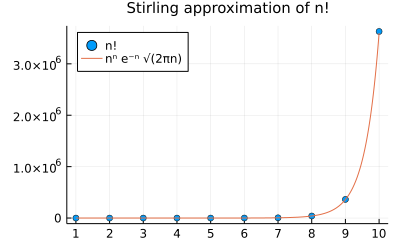

In [18]:
N = 10
plot(; legend=:topleft, xtick=1:N)
scatter!(1:N, factorial; label="n!")
plot!(stirling, 1, N; label="nⁿ e⁻ⁿ √(2πn)")
title!("Stirling approximation of n!")

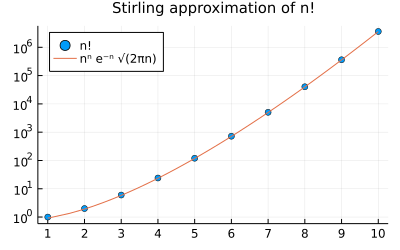

In [19]:
N = 10
plot(; legend=:topleft, xtick=1:N)
scatter!(1:N, factorial; label="n!")
plot!(stirling, 1, N; label="nⁿ e⁻ⁿ √(2πn)")
title!("Stirling approximation of n!")
plot!(;yscale=:log10)

### Stirlingの公式とガンマ分布の正規分布近似(中心極限定理)の関係

この節では, Stirlingの公式は本質的にガンマ分布の正規分布近似(中心極限定理ともいう)から出て来ることを説明する.

スケールパラメータが $\theta=1$ で形状パラメータが $\alpha=n+1$ のガンマ分布 $\op{Gamma}(n+1, 1)$ の確率密度函数は

$$
p_n(x) = \frac{e^{-x} x^n}{\Gamma(n+1)} = \frac{e^{-x} x^n}{n!} \quad (x > 0)
$$

という形になる. この $p_n(x)$ の分子の対数を $f_n(x) と書く:

$$
f_n(x) = \log (e^{-x} x^n) = n \log x  - x.
$$

$f_n(x)$ を $x = n$ でTaylor展開してみよう.

$$
f_n(n) = n\log n - n, \quad
f_n'(x) = \frac{n}{x} - 1, \quad
f_n'(n) = 0, \quad
f_n''(x) = -\frac{n}{x^2}, \quad
f_n''(n) = -\frac{1}{n}.
$$

これより, $x$ が $n$ に近いとき,

$$
f_n(x) \approx n\log n - n - \frac{(x - n)^2}{2n}.
$$

ゆえに, $x$ が $n$ に近いとき, $f_n(x)$ の $x=n$ でのTaylor展開より,

$$
e^{-n}x^n = \exp(f_n(x)) \approx
\exp\left(n\log n - n - \frac{(x - n)^2}{2n}\right) =
n^n e^{-n} \exp\left(-\frac{(x - n)^2}{2n}\right).
$$

$n$ が大きなとき, $e^{-n}x^n$ も $\exp(-(x - n)^2/(2n))$ も $x$ が $n$ から離れると急激に $0$ に近付くので, それぞれの $x > 0$, $-\infty<x<\infty$ における積分は $n$ に近い $x$ における積分で近似される.  したがって,

$$
\begin{aligned}
1& = \int_0^\infty p_n(x)\,dx =
\frac{1}{n!}\int_0^\infty e^{-n}x^n\,dx
\\ &\approx
\frac{1}{n!}\int_{\text{around}\; n} e^{-n}x^n\,dx \approx
\frac{n^n e^{-n}}{n!}\int_{\text{around}\; n} \exp\left(-\frac{(x - n)^2}{2n}\right)\,dx
\\ &\approx
\frac{n^n e^{-n}}{n!}\int_{-\infty}^\infty \exp\left(-\frac{(x - n)^2}{2n}\right)\,dx =
\frac{n^n e^{-n}\sqrt{2\pi n}}{n!}.
\end{aligned}
$$

これで $n! \approx n^n e^{-n}\sqrt{2\pi n}$ が再び示された.

以上の計算によってガンマ分布 $\op{Gamma}(n+1, 1)$ の密度函数 $p_n(x)$ が平均 $n$, 分散 $n$ の正規分布の密度函数で近似されることも示せている:

$$
p_n(x) = \frac{e^{-x} x^n}{n!} \approx
\frac{1}{\sqrt{2\pi n}}\exp\left(-\frac{(x - n)^2}{2n}\right).
$$

以上はかなり雑な議論だが, 議論の全体を正確に作り直すこともできるし, 以下で示すようにグラフを描くことによっても結果が正しいことを確認できる.

In [20]:
p_gamma(n, x) = x > 0 ? exp(n*log(x) - x - loggamma(n+1)) : zero(x)
p_gamma_normalapprox(n, x) = 1/√(2π*n) * exp(-(x - n)^2/(2n))
function plot_gamma_normal(n; kwargs...)
    x = range(n - 5√n, n + 6√n, 1000)
    P1 = plot(x, x -> p_gamma(n, x); label="Gamma(n+1,1)", kwargs...)
    plot!(x, x -> p_gamma_normalapprox(n, x); label="Normal(n,√n)", ls=:dash)
    vline!([n]; label="", c=:black, ls=:dot)
    title!("n = $n")
    P2 = plot(x, x -> p_gamma_normalapprox(n, x) - p_gamma(n, x); label="difference", kwargs...)
    plot!(x, x -> p_gamma(n, 2n - x) - p_gamma_normalapprox(n, 2n - x); label="180° rotation")
    vline!([n]; label="", c=:black, ls=:dot)
    hline!([0]; label="", c=:black, ls=:dot)
    plot!(ylim=(-1.05p_gamma(n,n), 1.05p_gamma(n,n)))
    plot(P1, P2; size=(800, 250))
end

plot_gamma_normal (generic function with 1 method)

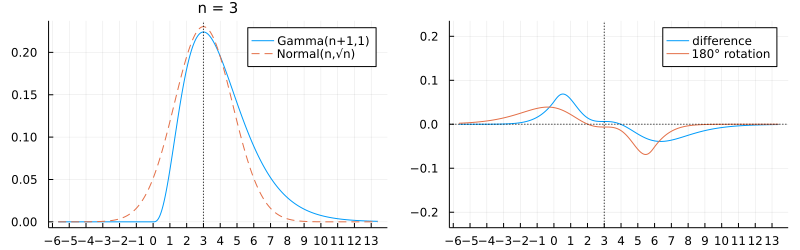

In [21]:
plot_gamma_normal(3; xtick=-20:20)

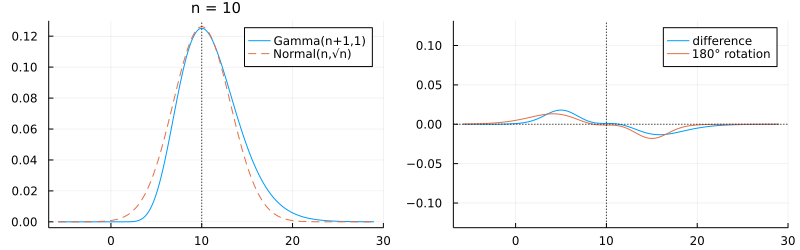

In [22]:
plot_gamma_normal(10)

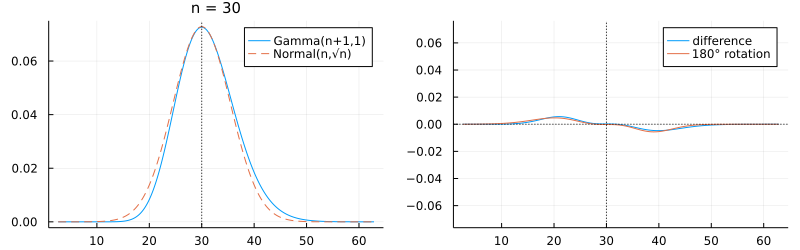

In [23]:
plot_gamma_normal(30)

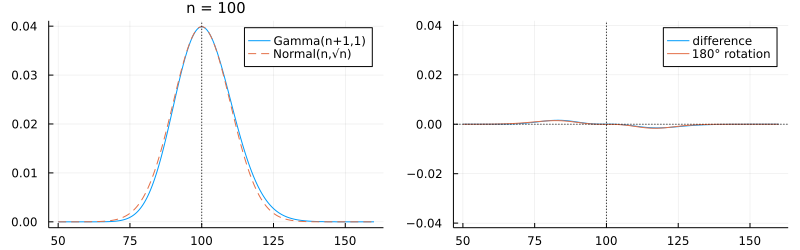

In [24]:
plot_gamma_normal(100)

## ベータ函数

### ベータ函数の定義

$\alpha, \beta > 0$ について, ベータ函数 $B(\alpha, \beta)$ を次のように定める:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1 - t)^{\beta-1}\,dt.
$$

ベータ函数のこの表示は通常の(第1種)ベータ分布だけではなく, $F$ 分布(Fisherの $F$ 分布)とも関係している.  ベータ函数の様々な表示が正規分布に関連した重要な分布達の基礎を与える.

### ベータ分布の定義

$\alpha, \beta > 0$ と仮定する.

次の確率密度函数によって定義される連続分布をパラメータ $\alpha,\beta$ の __ベータ分布__ (Beta distribution)と呼び, $\op{Beta}(\alpha, \beta)$ と表す:

$$
p(t|\alpha,\beta) = \frac{1}{B(\alpha, \beta)} t^{\alpha-1} (1 - t)^{\beta-1} 
\quad (0 < t < 1)
$$

二項分布がBernoulli試行(値が $1$ と $0$ のみの乱数生成の繰り返し)から得られたのと同じように, パラメータが正の整数の場合のベータ分布は一様乱数の生成の繰り返しから得られる.  この事実については後で別のノートで解説する予定である.  この段階ではベータ分布にも後で説明されるように直観的な意味付けがあることを覚えておけばよい.  実用的に使用される確率分布の世界は豊富かつ複雑であり, それらを単に暗記しようとすることには無理がある.  直観的な意味付けを十分に理解して先に進む方が効率的な場合が多い.

ベータ分布の密度函数は $\alpha < 0$ ならば $t\searrow 0$ のとき無限大になり, $\beta > 0$ ならば $t\nearrow 1$ のとき無限大に発散することには注意しなければいけない.  

__$\alpha$ と $\beta$ の両方が大きなとき, ベータ分布は正規分布で近似される.__

ベータ分布の密度函数のグラフは以下のようになる.

In [25]:
function plot_beta(α, β; kwargs...)
    beta = Beta(α, β)
    normal = Normal(mean(beta), std(beta))
    if α < 1 || β < 1
        x = range(eps(), 1-eps(), 1000)
        plot(x, x -> pdf(beta, x); ylim=(-0.1, 4.1), label="Beta(α, β)")
    else
        plot(x -> pdf(beta, x), 0, 1; label="Beta(α, β)")
    end
    plot!(x -> pdf(normal, x), 0, 1; label="normal approx.", ls=:dash)
    title!("α = $α,  β = $β")
    plot!(; xtick=0:0.1:1, kwargs...)
end

plot_beta (generic function with 1 method)

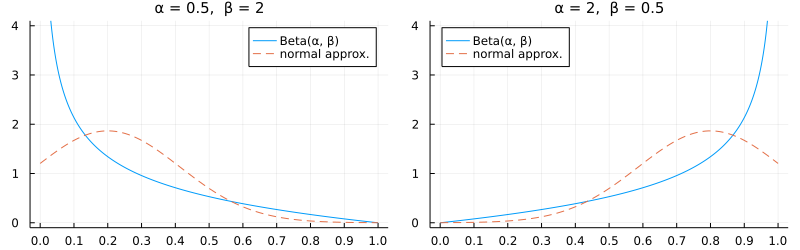

In [26]:
plot(plot(plot_beta(0.5, 2)), plot(plot_beta(2, 0.5); legend=:topleft); size=(800, 250))

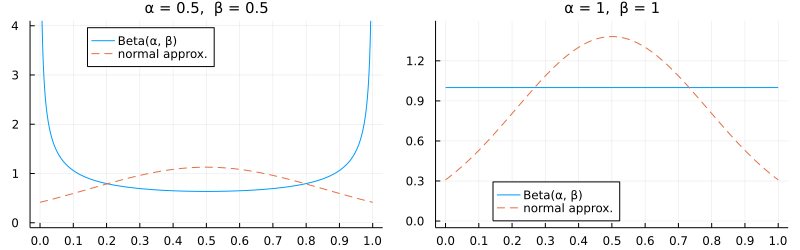

In [27]:
plot(plot(plot_beta(0.5, 0.5); legend=:top),
    plot(plot_beta(1, 1); legend=:bottom, ylim=(-0.05, 1.5)); size=(800, 250))

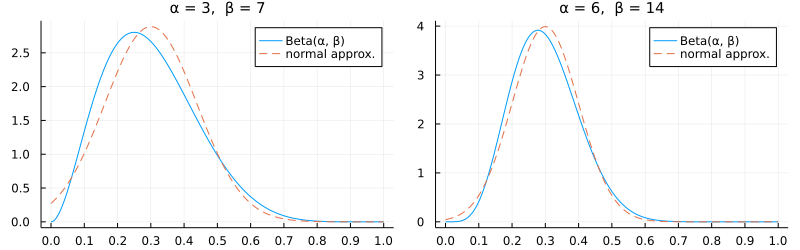

In [28]:
plot(plot(plot_beta(3, 7)), plot(plot_beta(6, 14)); size=(800, 250))

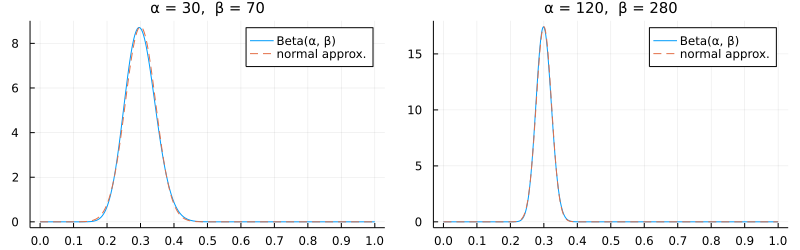

In [29]:
plot(plot(plot_beta(30, 70)), plot(plot_beta(120, 280)); size=(800, 250))

### 問題: ベータ分布の期待値と分散

分布 $\op{Beta}(\alpha, \beta)$ の期待値と分散がそれぞれ

$$
\frac{\alpha}{\alpha+\beta}, \quad
\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

となることを示せ. ただし, あとで示すことになる公式 $B(\alpha,\beta)=\Gamma(\alpha)\Gamma(\beta)/\Gamma(\alpha+\beta)$ を自由に用いてよい.

__解答例:__ $T$ は分布 $\op{Beta}(\alpha, \beta)$ に従う確率変数とする.

$$
\begin{aligned}
E[T^k] &=
\frac{1}{B(\alpha,\beta)}\int_0^1 t^{\alpha+k-1}(1-t)^{\beta-1}\,dt =
\frac{B(\alpha+k, \beta)}{B(\alpha,\beta)} \\ &=
\frac{\Gamma(\alpha+k)\Gamma(\beta)}{\Gamma(\alpha+\beta+k)}
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} =
\frac{\alpha(\alpha+1)\cdots(\alpha+k-1)}{(\alpha+\beta)(\alpha+\beta+1)\cdots(\alpha+\beta+k-1)}.
\end{aligned}
$$

ゆえに $E[T] = \alpha/(\alpha+\beta)$,

$$
\begin{aligned}
\op{var}(T) &= 
E[T^2] - E[T]^2 =
\frac{\alpha(\alpha+1)}{(\alpha+\beta)(\alpha+\beta+1)} - \frac{\alpha^2}{(\alpha+\beta)^2} \\ &=
\frac{\alpha((\alpha+1)(\alpha+\beta) - \alpha(\alpha+\beta+1))}{(\alpha+\beta)^2(\alpha+\beta+1)} =
\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}.
\end{aligned}
$$

__解答終__

### ベータ函数は $\alpha$ と $\beta$ を交換しても不変

$t = 1 - u$ とおくと,

$$
B(\beta, \alpha) =
\int_0^1 t^{\beta-1} (1 - t)^{\alpha-1}\,dt =
\int_1^0 (1 - u)^{\beta-1} u^{\alpha-1}\,(-du) =
\int_0^1 u^{\alpha-1} (1 - u)^{\beta-1}\,du =
B(\alpha, \beta).
$$

### 問題: ベータ分布の三角函数を使った表示

次を示せ:

$$
B(\alpha, \beta) = 
2\int_0^{\pi/2} (\cos\theta)^{2\alpha - 1} (\sin \theta)^{2\beta - 1}\,d\theta
\quad (\alpha, \beta > 0).
$$

__解答例:__ $\alpha, \beta > 0$ と仮定する.  $t = \cos^2\theta$ とおくと, $dt = -2\cos\theta\,\sin\theta\,d\theta$ なので, 

$$
\begin{aligned}
B(\alpha, \beta) &=
\int_0^1 t^{\alpha-1} (1 - t)^{\beta-1}\,dt =
\int_{\pi/2}^0 (\cos\theta)^{2(\alpha-1)} (\sin\theta)^{2(\beta-1)}\,(-2\cos\theta\,\sin\theta\,d\theta) =
\\ & =
2\int_0^{\pi/2} (\cos\theta)^{2\alpha - 1} (\sin \theta)^{2\beta - 1}\,d\theta.
\end{aligned}
$$

__解答終__

__注意:__ 特に

$$
B(1/2, 1/2) = 2\int_0^{\pi/2}d\theta = \pi.
$$

となることがわかる. 次の積分は __Wallis積分__ と呼ばれている:

$$
\int_0^{\pi/2} \sin^n \theta\, d\theta =
\frac{1}{2}B(1/2, (n+1)/2).
$$

### ベータ函数の極限としてガンマ函数を表せること

$\alpha > 0$, $b\in\R$ であると仮定する. このとき, 次が成立している:

$$
\lim_{n\to\infty} n^\alpha B(\alpha, n+b) = \Gamma(\alpha).
$$

積分変数を $t = x/n$ で $x$ に変換すると,

$$
\begin{aligned}
n^\alpha B(\alpha, n+b) &=
n^\alpha \int_0^1 t^{\alpha-1} (1 - t)^{n+b-1}\, dt
\\ &=
n^\alpha \int_0^n \left(\frac{x}{n}\right)^{\alpha-1}
\left(1 - \frac{x}{n}\right)^{n+b-1} \frac{dx}{n} =
\int_0^n x^{\alpha-1} \left(1 - \frac{x}{n}\right)^{n+b-1}\,dx
\end{aligned}
$$

なので, $n\to\infty$ のとき, $(1 - x/n)^{n+b-1} \to e^{-x}$ となることを使うと,

$$
n^\alpha B(\alpha, n+b) \to
\int_0^\infty x^{\alpha-1}e^{-x}\,dx = \Gamma(\alpha).
$$

__例:__ $t$ 分布の自由度無限大の極限の計算で使った $\sqrt{\nu}B(1/2, \nu/2)$ の $\nu\to\infty$ の極限は上の結果を使うと以下のようにして計算される:

$$
\sqrt{\nu}B(1/2, \nu/2) =
\sqrt{2}\sqrt{\nu/2}B(1/2, \nu/2) \to
\sqrt{2}\,\Gamma(1/2) = \sqrt{2\pi}.
$$

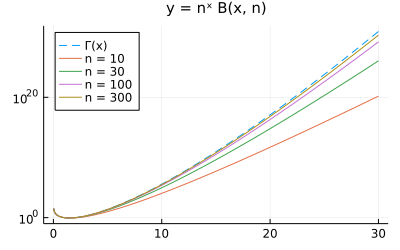

In [30]:
beta_approx_of_gamma(n, α) = exp(α*log(n) + logbeta(α, n))
x = range(0, 30, 1000)
plot(; legend=:topleft, yscale=:log10)
plot!(x, gamma; label="Γ(x)", ls=:dash)
for n in (10, 30, 100, 300)
    plot!(x, x -> beta_approx_of_gamma(n, x); label="n = $n")
end
title!("y = nˣ B(x, n)")

### ベータ函数の別の基本的表示

統計学的にはベータ函数の次の表示も重要である:

$$
B(\alpha, \beta) =
\int_0^\infty \frac{u^{\alpha-1}\,du}{(1 + u)^{\alpha+\beta}} =
\int_0^\infty \frac{u^{\beta-1}\,du}{(1 + u)^{\alpha+\beta}}.
$$

この表示は $t$ 分布(Studentの $t$ 分布)と関係している.

上の表示は以下のようにして証明される.

$t = u/(1+u) = 1 - 1/(1+u)$ とおくと, $dt = du/(1+u)^2$ となるので,

$$
B(\alpha, \beta) =
\int_0^1 t^{\alpha-1} (1 - t)^{\beta-1}\,dt =
\int_0^\infty \left(\frac{u}{1+u}\right)^{\alpha-1} \left(\frac{1}{1+u}\right)^{\beta-1}\frac{du}{(1+u)^2} =
\int_0^\infty \frac{u^{\alpha-1}\,du}{(1 + u)^{\alpha+\beta}}
$$

となる. ベータ函数は $\alpha$ と $\beta$ の交換で不変なので被積分函数の分子の $\alpha$ を $\beta$ で置き換えても等しくなる.

__注意:__ $0<t<1$ と $0<u<\infty$ と $-\infty<x<\infty$ のあいだの変数変換

$$
t = \frac{u}{1+u} = \frac{1}{1+e^{-x}} = \op{logistic}(x), \quad
\frac{t}{1-t} = u = e^x, \quad
\op{logit}(t) = \log\frac{t}{1-t} = \log u = x 
$$

は統計学に関連した計算で非常によく現れる鉄板の基本パターンの一つである.  $t$ を確率とみなすとき, $u=t/(1-t)$ をその __オッズ__ と呼び, $x = \log(t/(1-t))$ をその __ロジット変換__ と呼ぶ.

### 問題: $t$ 分布の基礎になる公式

次を示せ:

$$
\int_{-\infty}^\infty \left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2}\,dt =
\sqrt{\nu}\,B(1/2, \nu/2)
\quad (\nu > 0).
$$

__解答例:__ $\nu > 0$ と仮定する.

$$
\begin{aligned}
&
\int_{-\infty}^\infty \left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2}\,dt =
2\int_0^\infty \left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2}\,dt =
2\sqrt{\nu} \int_0^\infty (1 + s^2)^{-(\nu+1)/2}\,ds
\\ & \quad =
\sqrt{\nu} \int_0^\infty (1 + u)^{-(\nu+1)/2}\,u^{-1/2}\,du =
\sqrt{\nu} \int_0^\infty \frac{u^{1/2 - 1}\,du}{(1 + u)^{1/2+\nu/2}} =
\sqrt{\nu}\,B(1/2, \nu/2).
\end{aligned}
$$

最初の等号で被積分函数が偶函数であることを使った. 2つめの等号で $t = \sqrt{\nu}\,s$ とおいた. 3つめの等号で $s = \sqrt{u}$, $ds = u^{-1/2}\,du/2$ とおいた. 最後の等号でベータ函数の別の基本的表示を使った.

__解答終__

__注意:__ 上の計算での積分変数の変換では $t = \sqrt{\nu u}$, $u = t^2/\nu$ となっている.

### $t$ 分布の定義

$\nu > 0$ と仮定する.

次の確率密度函数によって定義される連続分布を __自由度__ (degree of freedom) が $\nu$ の __$t$ 分布__ (__Student の $t$ 分布__, Student's $t$-distribution)と呼び, $\op{TDist}(\nu)$ と表す:

$$
p(t|\nu) = \frac{1}{\sqrt{\nu}\,B(1/2, \nu/2)} \left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2}.
$$

$t$ 分布は正規分布モデルによる平均に関する検定や推定で基本的な役目を果たすことになる. この点については後で別のノートで詳しく説明する. 

### 問題: $t$ 分布の自由度無限大の極限で標準正規分布が得られること

$t$ 分布の確率密度函数 $p(t|\nu)$ について次を示せ:

$$
\lim_{\nu\to\infty} p(t|\nu) = \frac{1}{\sqrt{2\pi}}e^{-t^2/2}.
$$

__解答例:__ $t\in\R$ であるとする.

$$
p(t|\nu) = \frac{1}{\sqrt{\nu}\,B(1/2, \nu/2)} \left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2}
$$

なので, $\nu\to\infty$ のとき, $\sqrt{\nu}\,B(1/2, \nu/2)\to\sqrt{2\pi}$ かつ $(1 + t^2/\nu)^{-(\nu+1)/2} \to e^{-t^2}$ となることを示せばよい.  

$N\to\infty$ のとき $(1 + x/N)^N\to e^x$ より, $\nu\to\infty$ とすると,

$$
\left(1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2} =
\left(1 + \frac{t^2/2}{\nu/2}\right)^{-\nu/2}
\left(1 + \frac{t^2/2}{\nu/2}\right)^{-1/2}
\to e^{-t^2/2}.
$$

$u = x/(\nu/2)$ とおくと, $du/u = dx/x$ なので,

$$
\begin{aligned}
\sqrt{\nu}\,B(1/2, \nu/2) &=
\sqrt{\nu} \int_0^\infty \frac{u^{1/2 - 1}\,du}{(1 + u)^{1/2+\nu/2}} =
\frac{\sqrt{\nu}}{(\nu/2)^{1/2}} \int_0^\infty \frac{x^{1/2 - 1}\,dx}{(1 + x/(\nu/2))^{1/2+\nu/2}}
\\ &=
\sqrt{2} \int_0^\infty \frac{x^{1/2 - 1}\,dx}{(1 + x/(\nu/2))^{1/2+\nu/2}}
\end{aligned}
$$

なので $\nu\to\infty$ とすると,

$$
\sqrt{\nu}\,B(1/2, \nu/2) \to
\sqrt{2}\int_0^\infty \frac{x^{1/2 - 1}\,dx}{e^{x}} =
\sqrt{2}\int_0^\infty e^{-x} x^{1/2 - 1}\,dx =
\sqrt{2}\,\Gamma(1/2) = \sqrt{2\pi}.
$$
__解答終__

__注意:__ $t$ 分布という新しい複雑に見える確率分布を定義したが, 自由度が大きな場合には, $t$ 分布の代わりに正規分布を使った議論と実践的には(近似的には)同じ結果が得られることになる. 自由度が大体 $30$ 程度で実践的には $t$ 分布はほぼ正規分布だと思ってよい場合が多い.  $t$ 分布の自由度はほぼ標本サイズになることが多いので, 標本サイズが大きな場合には複雑に見える $t$ 分布の代わりに正規分布を使っても大差ないことになる.  このように, ざくっとどんぶり勘定することによって, 複雑に見える議論を単純化することは統計学を実用的に使うときに重要である. 

### $t$ 分布と標準正規分布を同時プロット

In [31]:
function plot_tdist(ν)
    P = plot(x -> pdf(TDist(ν), x), -6, 6; label="", title="TDist($ν)")
    plot!(x -> pdf(Normal(), x), -6, 6; label="Normal()", ls=:dash)
end

plot_tdist (generic function with 1 method)

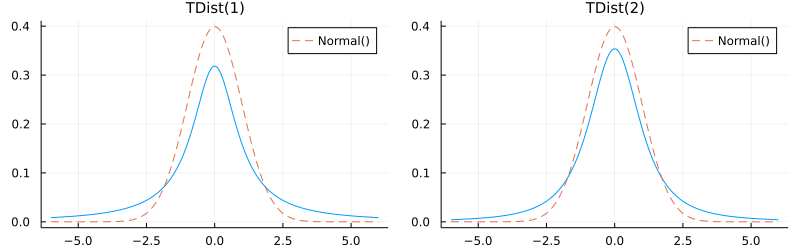

In [32]:
plot(plot_tdist(1), plot_tdist(2); size=(800, 250))

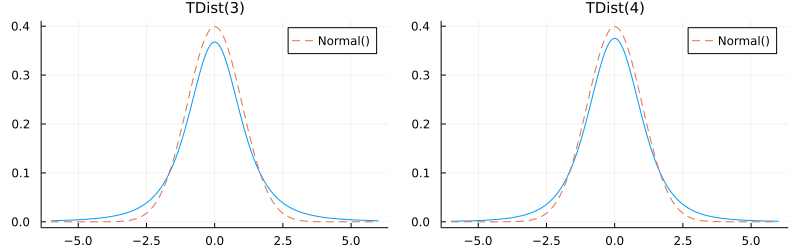

In [33]:
plot(plot_tdist(3), plot_tdist(4); size=(800, 250))

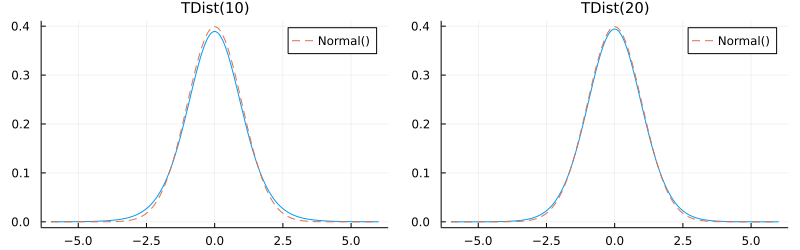

In [34]:
plot(plot_tdist(10), plot_tdist(20); size=(800, 250))

## ベータ函数のガンマ函数表示

ベータ函数をガンマ函数で表せることから, ガンマ分布とベータ分布の関係が得られる.

$\alpha, \beta > 0$ について次が成立している:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}.
$$

これを示すためには

$$
\Gamma(\alpha)\Gamma(\beta) = \Gamma(\alpha+\beta)B(\alpha, \beta)
$$

を示せばよい.

### 積分 $J[f]$ を導入とベータ函数のガンマ函数表示の証明

後で, ガンマ分布とベータ分布を関係付けるために, 函数 $f(z, t)$ について次の積分を考える:

$$
J[f] = 
\int_0^\infty\int_0^\infty
f\left(x+y, \frac{x}{x+y}\right)\, e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\,dy.
$$

このとき, 次が成立している:

$$
J[f] =
\int_0^\infty\left(
\int_0^1 f(z, t)\, e^{-z} z^{\alpha+\beta-1}\,t^{\alpha-1}(1 - t)^{\beta-1}\,dt
\right) dz
$$

もしもこの公式が証明されたならば, $J[f]$ の定義より, $f(z,t)=1$ のとき, 

$$
\begin{aligned}
J[1] &=
\int_0^\infty\int_0^\infty e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\,dy
\\ &=
\int_0^\infty e^{-x} x^{\alpha-1}\,dx \cdot \int_0^\infty e^{-y} y^{\beta-1}\,dy =
\Gamma(\alpha)\Gamma(\beta)
\end{aligned}
$$

となり, 上の公式より,

$$
\begin{aligned}
J[1] &=
\int_0^\infty\left(
\int_0^1 e^{-z} z^{\alpha+\beta-1}\,t^{\alpha-1}(1 - t)^{\beta-1}\,dt
\right) dz
\\ &=
\int_0^\infty e^{-z} z^{\alpha+\beta-1}\,dz \cdot
\int_0^1 t^{\alpha-1}(1 - t)^{\beta-1}\,dt =
\Gamma(\alpha+\beta)B(\alpha, \beta).
\end{aligned}
$$

以上を比較すれば $\Gamma(\alpha)\Gamma(\beta)=\Gamma(\alpha+\beta)B(\alpha,\beta)$ が得られる.

### 積分 $J[f]$ に関する公式の証明

前節で説明した $J[f]$ に関する公式は以下のようにして示される. 積分変数 $y$ を $y = z - x$ によって $z$ に変換すると, $0<y<\infty$ と $x<z<\infty$ のあいだの一対一対応が得られるので,

$$
\begin{aligned}
J[f] &= 
\int_0^\infty \left(\int_0^\infty
f(x+y, x/(x+y))\, e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dy\right) dx
\\ &=
\int_0^\infty \left(\int_x^\infty
f(z, x/z)\, e^{-z} x^{\alpha-1}(z - x)^{\beta-1}\,dz\right) dx.
\end{aligned}
$$

この二重積分で $(x, z)$ の動く範囲は $0<x<z<\infty$ である.  その範囲で $(x, z)$ を動かすためには, まず $0<z<\infty$ を満たす $z$ を与えてから, $0<x<z$ を満たす $x$ を与えればよい.  ゆえにその二重積分の積分順序を次のように交換できる:

$$
J[f] = 
\int_0^\infty \left(\int_0^z
f(z, x/z)\, e^{-z} x^{\alpha-1}(z - x)^{\beta-1}\,dx\right) dz.
$$

積分変数 $x$ を $x = zt$ によって $t$ に変換すると, $0<x<z$ と $0<t<1$ のあいだの一対一対応が得られるので,

$$
J[f] =
\int_0^\infty \left(\int_0^1
f(z, t)\, e^{-z} (zt)^{\alpha-1}(z(1-t))^{\beta-1}\,z\,dt\right) dz
$$

この二重積分の被積分函数の $f(z, t)$ 以外の因子は $z,t$ のそれぞれの単独変数函数の積の形になっており, 次のように整理される:

$$
J[f] =
\int_0^\infty\left(
\int_0^1 f(z, t)\,e^{-z} z^{\alpha+\beta-1}\,t^{\alpha-1}(1 - t)^{\beta-1}\,dt
\right) dz.
$$

これで示したい公式が示された.

### 問題: ガンマ分布とベータ分布の関係 (ベータ分布のガンマ分布表示)

$\alpha, \beta > 0$ と仮定する.  正の実数に値を持つ確率変数 $X$, $Y$ の組 $(X, Y)$ の確率密度函数は, ガンマ分布達 $\op{Gamma}(\alpha, 1)$, $\op{Gamma}(\beta, 1)$ の確率密度函数の積になっていると仮定する:

$$
p(x, y) =
\frac{e^{-x} x^{\alpha-1}}{\Gamma(\alpha)} \frac{e^{-y} y^{\beta-1}}{\Gamma(\beta)} =
\frac{e^{-(x+y)} x^{\alpha-1} y^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)} 
\quad (x, y > 0)
$$

この $p(x, y)$ を確率変数 $X,Y$ の __同時確率密度函数__ (simultaneous probability density function)と呼ぶ. 同時確率密度函数がこのように各々の確率変数の確率密度函数の積になっているとき, それらの確率変数達は __独立__ (independent)であるという.  以上の設定を次のように書くことにする:

$$
X \sim \op{Gamma}(\alpha, 1), \quad
Y \sim \op{Gamma}(\beta, 1) \quad
(\text{independent})
$$

このとき,

$$
X + Y \sim \op{Gamma}(\alpha+\beta, 1), \quad
\frac{X}{X+Y} \sim \op{Beta}(\alpha, \beta) \quad
(\text{independent})
$$

となることを示せ. すなわち, $Z=X+Y$, $T=X/(X+Y)=X/Z$ とおき, 分布 $\op{Gamma}(\alpha+\beta, 1)$ の確率密度函数を $p_Z(z)$ と書き, 分布 $\op{Beta}(\alpha, \beta)$ の確率密度函数を $p_T(t)$ と書くとき, 次が成立することを示せ:

$$
E[f(Z, T)] = \int_0^\infty \left(\int_0^1 f(z,t)p_Z(z)p_T(t)\,dt\right)dz.
$$

__解答例:__ 分布 $\op{Gamma}(\alpha+\beta, 1)$ の確率密度函数 $p_Z(z)$ と分布 $\op{Beta}(\alpha, \beta)$ の確率密度函数を $p_T(t)$ はそれらの定義より次の形をしている:

$$
p_Z(z) = \frac{e^{-z}z^{\alpha+\beta-1}}{\Gamma(\alpha+\beta)}, \quad
p_T(t) = \frac{t^{\alpha-1} (1 - t)^{\beta-1}}{B(\alpha, \beta)} \quad
(z > 0,\; 0<t<1)
$$

確率変数の期待値の定義と前節の証明で使った $J[f]$ の定義を使うと,

$$
\begin{aligned}
E[f(Z, T)] &= 
\int_0^\infty\int_0^\infty f(x+y, x/(x+y)) p(x,y)\,dx\,dy
\\ &=
\int_0^\infty\int_0^\infty f(x+y, x/(x+y))
\frac{e^{-(x+y)} x^{\alpha-1} y^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}\,dx\,dy =
\frac{J[f]}{\Gamma(\alpha)\Gamma(\beta)} =
.
\end{aligned}
$$

$\Gamma(\alpha)\Gamma(\beta)=\Gamma(\alpha+\beta)B(\alpha,\beta)$ と前節で示した $J[f]$ に関する公式と $p_Z(z)$, $p_T(t)$ の定義を使うと, 

$$
\begin{aligned}
E[f(Z, T)] &= 
\frac{J[f]}{\Gamma(\alpha+\beta)B(\alpha,\beta)}
\\ &=
\int_0^\infty\left(
\int_0^1 f(z, t)\frac{e^{-z}z^{\alpha+\beta-1}}{\Gamma(\alpha+\beta)}\frac{t^{\alpha-1}(1 - t)^{\beta-1}}{B(\alpha,\beta)}\,dt
\right) dz 
\\ &=
\int_0^\infty \left(\int_0^1 f(z,t)p_Z(z)p_T(t)\,dt\right)dz.
\end{aligned}
$$

これで示すべきことが示された.

__解答終__

__注意:__ 上の問題の結果はガンマ分布達 $\op{Gamma}(\alpha, 1)$, $\op{Gamma}(\beta, 1)$ に従う独立な確率変数 $X, Y$ からガンマ分布 $\op{Gamma}(\alpha+\beta, 1)$ に従う確率変数を $X+Y$ の形で作れてかつ, ベータ分布 $\op{Beta}(\alpha, \beta)$ に従う確率変数を $X/(X+Y)$ の形で作れることを示した.

これは, ガンマ分布達 $\op{Gamma}(\alpha, 1)$, $\op{Gamma}(\beta, 1)$ に従う乱数達から, ガンマ分布 $\op{Gamma}(\alpha+\beta, 1)$ に従う乱数とベータ分布 $\op{Beta}(\alpha, \beta)$ に従う乱数を作れることを意味している.

上のように積分の煩雑な計算をするだけだと何をやっているのかがピンとこない人が多く出て来るかもしれないが, 確率変数達の以上のような関係は乱数の生成法のあいだの関係のことだと了解しておけば結果的に何をやっているのかわかりやすくなる.

そして, 以下のようにコンピュータによる計算によって数学的結果の正しさを数値的に確認することもできる.

ガンマ分布達の乱数を大量に生成.

In [35]:
α, β = 3, 5
n = 10^6
X = rand(Gamma(α, 1), n)
Y = rand(Gamma(β, 1), n);

ガンマ函数達の乱数達 $X$, $Y$ の分布の確認.

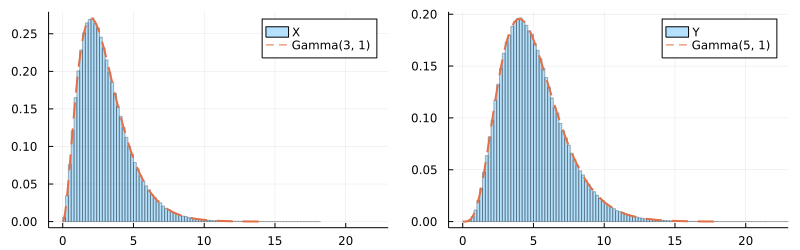

In [36]:
P1 = histogram(X; norm=true, alpha=0.3, bin=140, xlim=(-1, 23), label="X")
plot!(Gamma(α, 1); label="Gamma($α, 1)", lw=2, ls=:dash)

P2 = histogram(Y; norm=true, alpha=0.3, bin=140, xlim=(-1, 23), label="Y")
plot!(Gamma(β, 1); label="Gamma($β, 1)", lw=2, ls=:dash)

plot(P1, P2; size=(800, 250))

ガンマ函数の乱数達から $Z$ と $T$ を作成.

In [37]:
Z = @. X + Y
T = @. X / Z;

$Z$, $T$ の分布達がそれぞれガンマ分布とベータ分布になっていることの確認.

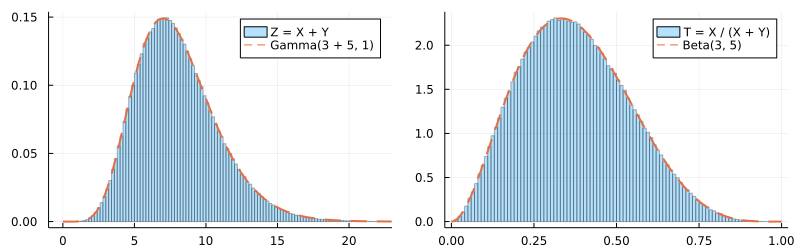

In [38]:
P3 = histogram(Z; norm=true, alpha=0.3, bin=140, xlim=(-1, 23), label="Z = X + Y")
plot!(Gamma(α + β, 1); label="Gamma($α + $β, 1)", lw=2, ls=:dash)

P4 = histogram(T; norm=true, alpha=0.3, bin=140, xlim=(-0.02, 1.02), label="T = X / (X + Y)")
plot!(Beta(α, β); label="Beta($α, $β)", lw=2, ls=:dash)

plot(P3, P4; size=(800, 250))

### 積分 $K[f]$ を導入とベータ函数のガンマ函数表示の別証明

函数 $g(z, u)$ に関する以下の積分を使って別証明を作っておく:

$$
K[g] = 
\int_0^\infty\int_0^\infty
g\left(x+y, \frac{x}{y}\right)\, e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\,dy.
$$

このとき, 次が成立している:

$$
K[g] =
\int_0^\infty \int_0^\infty
g(z, u)\, e^{-z} z^{\alpha+\beta-1}\,\frac{u^{\alpha-1}}{(1+u)^{\alpha+\beta}}
\,du\,dz.
$$

もしもこの公式が証明されたならば, $K[g]$ の定義より, $g(z,u)=1$ のとき, 

$$
\begin{aligned}
K[1] &=
\int_0^\infty\int_0^\infty e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\,dy
\\ &=
\int_0^\infty e^{-x} x^{\alpha-1}\,dx \cdot \int_0^\infty e^{-y} y^{\beta-1}\,dy =
\Gamma(\alpha)\Gamma(\beta)
\end{aligned}
$$

となり, 上の公式より,

$$
\begin{aligned}
K[1] &=
\int_0^\infty\left(
\int_0^\infty e^{-z} z^{\alpha+\beta-1}\,\frac{u^{\alpha-1}}{(1+u)^{\alpha+\beta}}\,dt
\right) dz
\\ &=
\int_0^\infty e^{-z} z^{\alpha+\beta-1}\,dz \cdot
\int_0^\infty \frac{u^{\alpha-1}\,du}{(1+u)^{\alpha+\beta}} =
\Gamma(\alpha+\beta)B(\alpha, \beta).
\end{aligned}
$$

以上を比較すれば $\Gamma(\alpha)\Gamma(\beta)=\Gamma(\alpha+\beta)B(\alpha,\beta)$ が得られる.

### 積分 $K[g]$ に関する公式の証明

前節で説明した $K[g]$ に関する公式は以下のようにして示される. 積分変数 $x$ を $x = yu$ によって $u$ に変換すると, $0<x<\infty$ と $0<u<\infty$ のあいだの一対一対応が得られるので,

$$
\begin{aligned}
K[g] &= 
\int_0^\infty \left(\int_0^\infty
g(x+y, x/y)\, e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\right) dy
\\ &=
\int_0^\infty \left(\int_0^\infty
g((1+u)y, u)\, e^{-(1+u)y} u^{\alpha-1} y^{\alpha+\beta-1}\,du\right) dy.
\end{aligned}
$$

この二重積分の積分順序を次のように交換すると,

$$
K[g] = 
\int_0^\infty \left(\int_0^\infty
g((1+u)y, u)\, e^{-(1+u)y} u^{\alpha-1} y^{\alpha+\beta-1}\,dy\right) du.
$$

積分変数 $y$ を $y = z/(1+u)$ によって $z$ に変換すると, 

$$
K[g] =
\int_0^\infty \left(\int_0^\infty
g(z, u)\, e^{-z} u^{\alpha-1} \left(\frac{z}{1+u}\right)^{\alpha+\beta-1} \frac{dz}{1+u}\right) du
$$

この二重積分の被積分函数の $g(z,u)$ 以外の因子は $z,u$ のそれぞれの単独変数函数の積の形になっており, 次のように整理される:

$$
K[g] =
\int_0^\infty\int_0^\infty
g(z, u)\, e^{-z} z^{\alpha+\beta-1}\,\frac{u^{\alpha-1}}{(1+u)^{\alpha+\beta}}
\,dz\,du.
$$

これで示したい公式が示された.

__$J[f]$ に関する結果を使った別証明:__ $f(z,t)=g(z,t/(1-t))$ とおくと, $u = t/(1-t) \iff t = u/(1+u)$ より, $g(z,u)=f(z,u/(1+u))$ なので, 

$$
\begin{aligned}
K[g] = J[f] &=
\int_0^\infty\int_0^\infty
f\left(x+y, \frac{x}{x+y}\right)\, e^{-(x+y)} x^{\alpha-1}y^{\beta-1}\,dx\,dy
\\ &=
\int_0^\infty\left(
\int_0^1 f(z, t)\, e^{-z} z^{\alpha+\beta-1}\,t^{\alpha-1}(1 - t)^{\beta-1}\,dt
\right) dz.
\end{aligned}
$$

$t = u/(1+u) = 1 - 1/(1+u)$, $dt=du/(1+u)^2$ とおくと, $0<t<1 \iff 0<u<\infty$ なので,

$$
\begin{aligned}
K[g] = J[f] &=
\int_0^\infty\left(
\int_0^\infty f(z, u/(1+u))\,e^{-z} z^{\alpha+\beta-1}\,
\left(\frac{u}{1+u}\right)^{\alpha-1}\left(\frac{1}{1+u}\right)^{\beta-1}\frac{du}{(1+u)^2}
\right) dz \\ &=
\int_0^\infty\left(
\int_0^\infty g(z, u)\, e^{-z} z^{\alpha+\beta-1}\,\frac{u^{\alpha-1}}{(1+u)^{\alpha+\beta}}\,du
\right) dz \\ &=
\int_0^\infty\int_0^\infty
g(z, u)\, e^{-z} z^{\alpha+\beta-1}\,\frac{u^{\alpha-1}}{(1+u)^{\alpha+\beta}}
\,dz\,du.
\end{aligned}
$$



### 問題: ガンマ函数のGaussの乗法公式

ベータ函数のガンマ函数表示とガンマ函数の函数等式とベータ函数の極限でガンマ函数を表せることを用いて, 次の公式を証明せよ:

$$
\lim_{n\to\infty}\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)} = \Gamma(\alpha).
$$

__解答例:__ ガンマ函数の函数等式より $\Gamma(\alpha+n+1) = (\alpha+n)\cdots(\alpha+1)\alpha\Gamma(\alpha)$ なので, $\Gamma(n+1)=n!$ とベータ函数のガンマ函数表示より,

$$
n^\alpha B(\alpha, n+1) =
\frac{n^\alpha \Gamma(\alpha)\Gamma(n+1)}{\Gamma(\alpha+n+1)} =
\frac{n^\alpha \Gamma(\alpha) n!}{(\alpha+n)\cdots(\alpha+1)\alpha\Gamma(\alpha)} =
\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)}.
$$

ベータ函数の極限でガンマ函数が表せることより, $n\to\infty$ のとき, 

$$
\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)} =
n^\alpha B(\alpha, n+1) \to \Gamma(\alpha)
$$

が得られる.

__解答終__

__注意:__ 上の公式をガンマ函数に関する __Gaussの乗法公式__ と呼ぶ.  上の公式の極限は $\alpha$ が0以下の整数以外の任意の複素数であっても収束している.

### 問題: $\sin$ の無限積表示

$f_\alpha(x)$ は $\cos(\alpha x)$ の $-\pi\le x\le \pi$ への制限の定義域を周期 $2\pi$ で $\R$ 全体に拡張して得られる連続函数であるとする.  このとき, $f_\alpha(x)$ の周期 $2\pi$ でのFourier級数は $f_n(x)$ に収束することを認めて, 次の $\sin$ の無限積表示を示せ:

$$
\sin(\pi\alpha) = \pi\alpha\prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right).
$$

__解答例:__ 偶函数 $f_\alpha(x)$ の周期 $2\pi$ のFourier級数を計算しよう.  $k = 0,1,2,\ldots$ について,

$$
\begin{aligned}
a_k := \int_{-\pi}^\pi f_\alpha(x)\cos(kx)\,dx &=
\int_{-\pi}^\pi \cos(\alpha x)\cos(kx)\,dx =
\frac{1}{2}\int_{-\pi}^\pi \left( \cos((\alpha+k)x) + \cos((\alpha-k)x) \right)dx
\\ &=
\frac{1}{2}\left[\frac{\sin((\alpha+k)x)}{\alpha+k} + \frac{\sin((\alpha-k)x)}{\alpha-k}\right]_{-\pi}^\pi =
(-1)^k\sin(\pi\alpha)\frac{2\alpha}{\alpha^2-k^2}.
\end{aligned}
$$

$\int_{-\pi}^\pi \cos^2(0x)\,dx = 2\pi$ でかつ $k=1,2,\ldots$ のとき

$$
\int_{-\pi}^\pi \cos^2(kx)\,dx =
\int_{-\pi}^\pi \frac{\cos(2kx) + 1}{2}\,dx =
\int_{-\pi}^\pi \frac{1}{2}\,dx =
\pi.
$$

ゆえに, $-\pi\le x\le\pi$ のとき,

$$
\cos(\alpha x) = f_\alpha(x) =
\frac{a_0}{2\pi} + \frac{1}{\pi}\sum_{k=1}^\infty a_k \cos(kx) =
\sin(\pi\alpha)\left(
\frac{1}{2\pi}\frac{2}{\alpha} +
\frac{1}{\pi}\sum_{k=1}^\infty (-1)^k\frac{2\alpha}{\alpha^2-k^2}\cos(kx)
\right).
$$

両辺を $\sin(\pi\alpha)/\pi$ で割って, $x=\pi$ とおくと, $\cos(k\pi)=(-1)^k$ より,

$$
\pi\cot(\pi\alpha) =
\frac{1}{s} + \sum_{k=1}^\infty\frac{2\alpha}{\alpha^2-k^2}.
\tag{$*$}
$$

$\sin$ の無限積表示

$$
\frac{\sin(\pi\alpha)}{\pi\alpha} = \prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right)
$$

を証明しよう. $\alpha\to 0$ とするとこの両辺はどちらも $1$ に等しくなる. ゆえに両辺の対数の導函数が等しければ, 両辺が等しいことがわかる.  左辺の対数の導函数は

$$
\frac{\pi\cos(\pi\alpha)}{\sin(\pi\alpha)} - \frac{\pi}{\pi\alpha} =
\pi\cot(\pi\alpha) - \frac{1}{\alpha}.
$$

右辺の対数の導函数は

$$
\sum_{k=1}^\infty \frac{-2\alpha/k^2}{1 - \alpha^2/k^2} =
\sum_{k=1}^\infty \frac{2\alpha}{\alpha^2 - k^2}.
$$

ゆえに($*$)より, 両辺の対数の導函数は互いに等しい.  これで $\sin$ の無限積表示が証明された.

__解答終__

### 問題: Wallisの公式

Gaussの乗法公式と $\sin$ の無限積表示

$$
\lim_{n\to\infty}\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)} = \Gamma(\alpha), \quad
\prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right) = \frac{\sin(\pi\alpha)}{\pi\alpha}
$$

を使って, 次の公式を示せ:

$$
\lim_{n\to\infty}\frac{2^{2n}(n!)^2}{\sqrt{n}\,(2n)!} = \sqrt{\pi},
\quad
\prod_{k=1}^\infty \frac{2k\cdot 2k}{(2k-1)(2k+1)} = \frac{\pi}{2}.
$$

これらを__Wallisの公式__ と呼ぶ.

__解答例:__ $\alpha=1/2$ とおけばよい. 分子分母に $2\cdot4\cdots(2n)=2^n n!$ をかけることによって,

$$
\frac{1}{2}\left(\frac{1}{2}+1\right)\cdots\left(\frac{1}{2}+n\right) =
\frac{1\cdot 3\cdots(2n-1)}{2^n}\left(\frac{1}{2}+n\right) =
\frac{(2n)!}{2^{2n}n!}\left(\frac{1}{2}+n\right).
$$

Gaussの乗法公式で極限を取る前の式で $\alpha=1/2$ とおくと,

$$
\frac{\sqrt{n}\,n!}{(1/2)(1/2+1)\cdots(1/2+n)} =
\frac{\sqrt{n}\,2^{2n}(n!)^2}{(2n)!(1/2+n)} =
\frac{2^{2n}(n!)^2}{\sqrt{n}\,(2n)!} \frac{n}{1/2+n}
$$

なので, 

$$
\lim_{n\to\infty} \frac{2^{2n}(n!)^2}{\sqrt{n}\,(2n)!} = \Gamma(1/2) = \sqrt{\pi}.
$$

$\sin$ の無限積表示の各因子は $\alpha=1/2$ とおくと,

$$
1 - \frac{(1/2)^2}{k^2} = \frac{(2k)^2 - 1}{(2k)^2} = \frac{(2k-1)(2k+1)}{2k\cdot 2k}
$$

になるので,

$$
\prod_{k=1}^\infty\frac{(2k-1)(2k+1)}{2k\cdot 2k} =
\frac{\sin(\pi/2)}{\pi/2} = \frac{2}{\pi}.
$$

これの逆数を取ればもう1つのWallisの公式も得られる.

__解答終__

以下はWallisの公式の数値的な確認. 階乗を数値計算で扱うときには常に $\log n!$ を扱うようにし, かけ算やわり算を直接的に使わずに対数を取ったものの和や差を計算して, 最後に指数函数を作用させる必要がある.

In [39]:
n = 10^6
@show n
@show exp(2n*log(2) + 2logfactorial(n) - (1/2)*log(n) - logfactorial(2n))^2
@show 2prod(2k*2k/((2k-1)*(2k+1)) for k in 1:n);

n = 1000000
exp((((2n) * log(2) + 2 * logfactorial(n)) - (1 / 2) * log(n)) - logfactorial(2n)) ^ 2 = 3.1415934154213083
2 * prod((((2k) * (2k)) / ((2k - 1) * (2k + 1)) for k = 1:n)) = 3.141591868192149


### 問題: ガンマ函数の相反公式(reflection formula)

$\sin$ の無限積表示

$$
\sin(\pi\alpha) = \pi\alpha\prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right)
$$

を使って, ガンマ函数のGaussの乗法公式から次の公式を導け:

$$
B(\alpha, 1-\alpha) = \Gamma(\alpha)\Gamma(1-\alpha) = \frac{\pi}{\sin(\pi\alpha)}.
$$

これをガンマ函数の __相反公式__ (reflection formula)と呼ぶ.

__解答例:__ 相反公式の両辺に $\alpha$ をかけて, $\alpha\Gamma(\alpha)=\Gamma(1+\alpha)$ を使った後に, 逆数を取ることによって得られる次の公式を示せば十分である:

$$
\frac{1}{\Gamma(1+\alpha)\Gamma(1-\alpha)} = \frac{\sin(\pi\alpha)}{\pi\alpha}.
$$

$\sin$ の無限積表示を認めて使うと, この公式は次と同値である:

$$
\frac{1}{\Gamma(1+\alpha)\Gamma(1-\alpha)} =
\prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right).
$$

これをGaussの乗法公式から導けばよい.

Gaussの情報公式より, 次の式は $n\to\infty$ で $1/(\Gamma(1+\alpha)\Gamma(1-\alpha))$ に収束する:

$$
\begin{aligned}
&
\frac{(1+\alpha)(2+\alpha)\cdots(n+1+\alpha)}{n^{1+\alpha}\,n!}
\frac{(1-\alpha)(2-\alpha)\cdots(n+1-\alpha)}{n^{1-\alpha}\,n!}
\\ &=
\frac{(n+1)^2}{n^2}
\left(1 + \frac{\alpha}{1}\right)
\left(1 + \frac{\alpha}{2}\right)
\cdots
\left(1 + \frac{\alpha}{n+2}\right)
\left(1 - \frac{\alpha}{1}\right)
\left(1 - \frac{\alpha}{2}\right)
\cdots
\left(1 - \frac{\alpha}{n+2}\right)
\\ &=
\frac{(n+1)^2}{n^2}
\prod_{k=1}^{n+1}\left(1 - \frac{\alpha^2}{k^2}\right)
\end{aligned}
$$

最初の等号で, 分母の $n^\alpha$ と $n^{-\alpha}$ をキャンセルさせて, 分子分母を $(n+1)!\times(n+1)!$ で割った.  上の最後の式は $n\to\infty$ で次に

$$
\prod_{k=1}^\infty\left(1 - \frac{\alpha^2}{k^2}\right)
$$

に収束する.  これで示すべきことが示された.

__解答終__

### ディガンマ函数, トリガンマ函数, ポリガンマ函数, Hurwitzのゼータ函数

統計学関係の計算ではガンマ函数やベータ函数の導函数達が必要になる場合がある. ベータ函数はガンマ函数で表示されるのでベータ函数の偏導函数の計算はガンマ函数の導函数の計算に帰着する.  ガンマ函数の導函数が必要になる場合として, ガンマ分布の最尤法や二項分布モデルやPoisson分布モデルのベイズ統計における情報量規準の計算などがある.

コンピュータでの基本特殊函数ライブラリの中にはガンマ函数の導函数の計算のために必要な __ディガンマ函数__ (digamma function), __トリガンマ函数__ (trigamma function), __ポリガンマ函数__ (polygamma function)が含まれている.  それらはガンマ函数そのものではなく, ガンマ函数の対数の導函数として定義される.  ディガンマ函数 $\psi(\alpha)$ は

$$
\psi(\alpha) = \frac{d}{d\alpha}\log\Gamma(\alpha) = \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}
$$

と定義される.  これの導函数

$$
\psi'(\alpha) = \frac{\Gamma(\alpha)\Gamma''(\alpha) - \Gamma'(\alpha)^2}{\Gamma(\alpha)^2}
$$

をトリガンマ函数と呼び, 高階の導函数 $\psi^{(k)}(\alpha)$ をポリガンマ函数と呼ぶ.

ガンマ函数の函数等式 $\gamma(\alpha+1)=\alpha\Gamma(\alpha)$ の両辺の対数を微分することによって,

$$
\psi(\alpha+1) = \psi(\alpha) + \frac{1}{\alpha}, \;
\psi'(\alpha+1) = \psi'(\alpha) - \frac{1}{\alpha^2}, \;
\psi''(\alpha+1) = \psi''(\alpha) + \frac{2}{\alpha^3}, \; \ldots
\tag{$*$}
$$

ガンマ函数のGaussの乗法公式

$$
\lim_{n\to\infty}\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)} = \Gamma(\alpha).
$$

と

$$
\frac{d}{d\alpha}\log\frac{n^\alpha\,n!}{\alpha(\alpha+1)\cdots(\alpha+n)} =
\log n - \sum_{k=0}^n \frac{1}{\alpha+k}
$$

より,

$$
\psi(\alpha) = \lim_{n\to\infty}\left(\log n - \sum_{k=0}^n \frac{1}{\alpha+k}\right), \;
\psi'(\alpha) = \sum_{k=0}^\infty \frac{1}{(\alpha+k)^2}, \;
\psi''(\alpha) = -2 \sum_{k=0}^\infty \frac{1}{(\alpha+k)^3}, \;\ldots
\tag{$**$}
$$

この($**$)から上の($*$)が成立することを確認することもできる.

調和級数 $\sum_{n=1}^N 1/n$ は $N\to\infty$ で無限大に発散するが, それから $\log N$ を引いたものは有限の値 $\gamma \approx 0.5772$ に収束することが知られている. この $\gamma$ を __Eulerの $\gamma$__ (オイラーの $\gamma$, Euler's gamma)と呼ぶことがある.  ($**$)の最初の式より,

$$
-\psi(1) =
\lim_{N\to\infty}\left(\sum_{n=1}^{N+1} \frac{1}{n} - \log N\right) =
\lim_{N\to\infty}\left(\sum_{n=1}^N \frac{1}{n} - \log N\right) =
\gamma \approx 0.5772.
$$

これと($*$)の最初の式から, 次が得られる:

$$
\psi(n+1) = \frac{1}{1} + \frac{1}{2} + \cdots + \frac{1}{n} - \gamma
\quad (n = 0,1,2,\ldots)
$$

ガンマ函数は階乗 $\Gamma(n+1)=n!$ の一般化になっていたが, ディガンマ函数はEulerの $\gamma$ の情報を含む調和級数の一般化になっていると考えられる.

__Hurwitzのゼータ函数__ (フルヴィッツのゼータ函数)が

$$
\zeta(s, \alpha) = \sum_{k=0}^\infty \frac{1}{(\alpha + k)^s}
$$

と定義される. トリガンマ函数以降のポリガンマ函数達は, 定数倍の違いを除いて, Hurwitzのゼータ函数で $s$ を2以上の整数にした場合になっている:

$$
\psi^{(k)}(\alpha) = (-1)^{k+1} k!\, \zeta(k+1, \alpha) \quad (k = 1,2,3,\ldots)
$$

$\zeta(s) = \zeta(s, 1) = \sum_{n=1}^\infty n^{-s}$ は __Riemannのゼータ函数__ (リーマンのゼータ函数)と呼ばれている.　ゼータ函数達は数論の基本的研究対象である.  ガンマ函数のよく使われる形から得られる

$$
\frac{1}{(\alpha + k)^s} = 
\frac{1}{\Gamma(s)} \int_0^\infty e^{-(\alpha + k)t} t^{s-1}\,dt
$$

という公式を使えば, Hurwitzのゼータ函数はガンマ函数のような積分表示を持つこともわかる:

$$
\zeta(s, \alpha) =
\frac{1}{\Gamma(s)}\int_0^\infty \sum_{k=0}^\infty e^{-(\alpha + k)t} t^{s-1}\,dt =
\frac{1}{\Gamma(s)}\int_0^\infty \frac{e^{-\alpha t}}{1 - e^{-t}}t^{s-1}\,dt.
$$

ガンマ函数の対数(対数ガンマ函数 (logarithmic Gamma function))は, 定数差を除いて, Hurwitzのゼータ函数の $s=0$ での微係数に等しいことも知られている(__Lerchの定理__(レルヒの定理)):

$$
\log\Gamma(\alpha) = \zeta_s(0, \alpha) + \log\sqrt{2\pi}.
$$

この公式を使うと階乗のStirling近似の精密化(__Binetの公式__)も自然に得られる:

$$
\varphi(x) = \int_0^\infty \left(\frac{1}{e^t-1}-\frac{1}{t}+\frac{1}{2}\right) e^{-xt}t^{-1}\,dt.
$$

とおくと,

$$
\log\Gamma(x+1) = x\log x - x +\frac{1}{2}\log x + \log\sqrt{2\pi} + \varphi(x).
$$

これはStirlingの公式 $\Gamma(n+1) = n! \approx n^n e^{-n} \sqrt{2\pi n}$ から得られる近似

$$
\log\Gamma(n+1) \approx n\log n - n + \frac{1}{2}\log n + \log\sqrt{2\pi}
$$

の精密化になっており, この近似の誤差が $\varphi(n)$ と書けることを意味している.

以上のようなことに興味がある人は次のリンク先を参照せよ:

* [10 Gauss積分, ガンマ函数, ベータ函数](https://nbviewer.org/github/genkuroki/Calculus/blob/master/10%20Gauss%2C%20Gamma%2C%20Beta.ipynb#Lerch%E3%81%AE%E5%AE%9A%E7%90%86%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FBinet%E3%81%AE%E5%85%AC%E5%BC%8F%E3%81%AE%E8%A8%BC%E6%98%8E)

__対数ガンマ函数とディガンマ函数とトリガンマ函数のグラフ:__

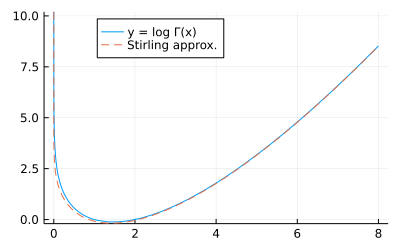

In [40]:
plot(loggamma, eps(), 8; label="y = log Γ(x)", ylim=(-0.2, 10.2))
plot!(x -> x*log(x) - x - (1/2)*log(x) + log(√(2π));
    label="Stirling approx.", ls=:dash)
plot!(; legend=:top)

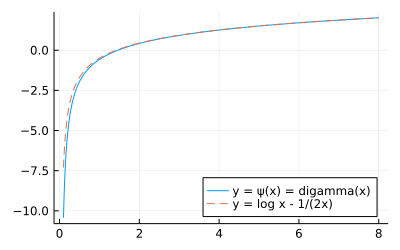

In [41]:
plot(digamma, 0.1, 8; label="y = ψ(x) = digamma(x)")
plot!(x -> log(x) - 1/(2x); label="y = log x - 1/(2x)", ls=:dash)
plot!(; legend=:bottomright)

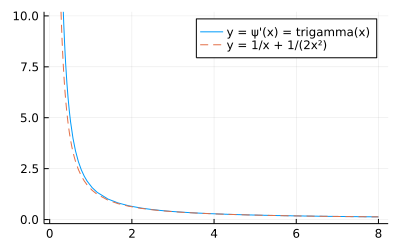

In [42]:
plot(trigamma, 0.1, 8; label="y = ψ'(x) = trigamma(x)", ylim=(-0.2, 10.2))
plot!(x -> 1/x + 1/(2x^2); label="y = 1/x + 1/(2x²)", ls=:dash)

## Dirichlet積分=多変数ベータ函数

$n$ 次元球体の体積を求める問題は, $a_i, p_i > 0$ に関する

$$
X =
\left\{\, (x_1,\ldots,x_n)\in\R_{\ge 0}^n \right.
\,\left|\, \left(\frac{x_1}{a_1}\right)^{p_1} + \cdots + \left(\frac{x_n}{a_n}\right)^{p_n} \le 1 \,\right\}
$$

の体積を求める問題に一般化される. さらにこの問題は $\alpha_i > 0$ も与えた場合の次の積分を計算する問題に一般化される:

$$
V = \int\!\!\cdots\!\!\int_X x_1^{\alpha_1-1}\cdots x_n^{\alpha_n-1}\,dx_1\cdots dx_n
$$

$\alpha_1=\cdots=\alpha_n=1$ のときこの積分は $X$ の体積になる.  この問題の解答は

$$
V =
\frac{a_1^{\alpha_1}\cdots a_n^{\alpha_n}}{p_1\cdots p_n}
\frac{\Gamma(\alpha_1/p_1)\cdots\Gamma(\alpha_n/p_n)}{\Gamma(\alpha_1/p_1 + \cdots +\alpha_n/p_n + 1)}.
$$

例えば, $\alpha_1=\cdots=\alpha_n=1$, $a_1=\cdots=a_n=1$, $p_1=\cdots=p_n=2$ のとき, $V$ の $2^n$ 倍の

$$
2^n V = \frac{\Gamma(1/2)^n}{\Gamma(n/2+1)} = \frac{\pi^{n/2}}{\Gamma(n/2+1)}
$$

は確かに $n$ 次元単位球体の体積になっている.

このような一般化にはどのような価値があるのだろうか. 上の問題の解答はDirichlet(ディリクレ)の1839年の論文

* Lejeune-Dirichlet. Sur une nouvelle méthode pour la détermination des intégrales multiples. Journal de Mathématiques Pures et Appliquées (1839), 164-168. ([link](https://eudml.org/doc/235403))

で与えられている. その論文でDirichletはベータ函数の多変数化であるDirichlet積分を発見した. Dirichlet積分はカテゴリカル分布と多項分布の共役事前分布であるDirichlet分布の「分母」となる統計学的にも重要な積分である.  統計学的にも重要なDirichlet積分は

* 高木貞治『解析概論』第8章第96節例2, pp.358-359
* 寺沢寛一『自然科学者のための 数学概論 \[増訂版\]』第5.21節\[4\], pp.216-217

でも紹介されている.  これらはガンマ函数入門のための文献としても優れている.

### Dirichlet積分=多変数ベータ函数の定義とそのガンマ函数表示

__Dirichlet積分__ は次の積分のことである:

$$
B(\alpha_1, \ldots, \alpha_{n+1}) =
\int\!\!\cdots\!\!\int_{\Delta_n} t_1^{\alpha_1-1}\cdots t_n^{\alpha_n-1}(1-(t_1+\cdots+t_n))^{\alpha_{n+1}-1}\,dt_1\cdots dt_n
\quad (\alpha_i > 0)
$$

ここで $\Delta_n$ は次の $n$ 次元領域である:

$$
\Delta_n =
\{\,(t_1,\ldots,t_n)\in \R_{>0}^n \mid t_1 + \cdots + t_n < 1 \,\}.
$$

$B(\alpha_1, \ldots, \alpha_{n+1})$ を __多変数ベータ函数__ とも呼ぶことにする.  多変数ベータ函数は次のガンマ函数表示を持つ.

$$
B(\alpha_1, \ldots, \alpha_{n+1}) =
\frac{\Gamma(\alpha_1)\cdots\Gamma(\alpha_{n+1})}{\Gamma(\alpha_1+\cdots+\alpha_{n+1})}.
$$

### Dirichlet分布の定義

$\alpha_1,\ldots,\alpha_r > 0$ と仮定する.  このとき, 

$$
\Delta_{r-1} = \{\,(t_1,\ldots,t_{r-1})\in \R_{>0}^{r-1} \mid t_1 + \cdots + t_{r-1} < 1 \,\}
$$

上の確率密度函数を

$$
p(t_1,\ldots,t_{r-1}|\alpha_1,\ldots,\alpha_r) =
\frac
{t_1^{\alpha_1-1}\cdots t_{r-1}^{\alpha_{r-1}-1}(1-(t_1+\cdots+t_{r-1}))^{\alpha_r-1}}
{B(\alpha_1, \ldots, \alpha_r)}
$$

と定めることができる.  この密度函数が定める多変量連続分布をDirichlet分布と呼び, 

$$
\op{Dirichlet}(\alpha_1,\ldots,\alpha_r)
$$

と表す.  対称性のためには

$$
t_r = 1 - (t_1 + \cdots + t_{r-1})
$$

とおいて, 

$$
\Delta^{r-1} = \{\,(t_1,\ldots,t_r)\in \R_{>0}^r \mid t_1 + \cdots + t_r = 1 \,\}
$$

上の確率分布だとみなした方がよい. これによって, Dirichlet分布は, カテゴリカル分布

$$
\op{Categorical}(t_1,\ldots,t_r) \quad (t_i > 0,\; t_1+\cdots+t_r=1)
$$

および多項分布

$$
\op{Multinomial}(n,t_1,\ldots,t_r) \quad (t_i > 0,\; t_1+\cdots+t_r=1)
$$

のパラメータ $(t_1,\ldots,t_r)$ に関する確率分布だとみなされる.  Dirichlet分布はカテゴリカル分布や多項分布の共役事前分布として重要である.

In [43]:
function _pdf_dirichlet(d::Dirichlet, p, q; valmax=Inf)
    0 ≤ q ≤ min(2p, -2p+2) || return NaN
    x, y = p - 0.5q, q
    clamp(pdf(d, SVector(x, y, 1 - x - y)), 0, valmax)
end

function plot_dirichlet!(d::Dirichlet; valmax=Inf, kwargs...)
    @assert length(d) == 3
    f(p, q) = _pdf_dirichlet(d, p, q; valmax)
    p = range(0, 1, length=401)
    q = range(0, 1, length=401)
    annotate!((1.00, 0.10, text("(1,0,0)", 8, -55.0, :right)))
    annotate!((0.55, 1.00, text("(0,1,0)", 8, -55.0, :left)))
    annotate!((0.00, 0.08, text("(0,0,1)", 8,  55.0, :left)))
    heatmap!(p, q, f.(p',q); kwargs...)
end

function plot_dirichlet(d::Dirichlet ; valmax=Inf, kwargs...)
    plot(; colorbar=false, tick=false, axis=false)
    plot_dirichlet!(d; valmax, kwargs...)
    plot!(; size=(250, 200))
    a, b, c = round.(d.alpha; digits=3)
    title!("Dirichlet($a, $b, $c)")
    plot!(; b=:gray)
end

plot_dirichlet(α₁, α₂, α₃ ; valmax=Inf, kwargs...) =
    plot_dirichlet(Dirichlet([α₁, α₂, α₃]) ; valmax, kwargs...)

plot_dirichlet (generic function with 2 methods)

以下はDirichlet分布のヒートマップである. 明るい部分ほど確率密度が大きい. 正三角形は $t_1,t_2,t_3>0$, $t_1+t_2+t_3=1$ を表し, 右下, 上, 左下の頂点はそれぞれ $(t_1,t_2,t_3)=(1,0,0), (0,1,0), (0,0,1)$ に対応しており, 正三角形の中心の座標は $(1/3, 1/3, 1/3)$ になる.

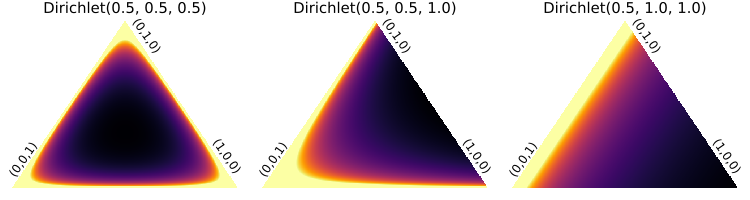

In [44]:
plot(plot_dirichlet(0.5, 0.5, 0.5; valmax=3),
    plot_dirichlet(0.5, 0.5, 1; valmax=3),
    plot_dirichlet(0.5, 1, 1; valmax=3); size=(750, 200), layout=(1,3))

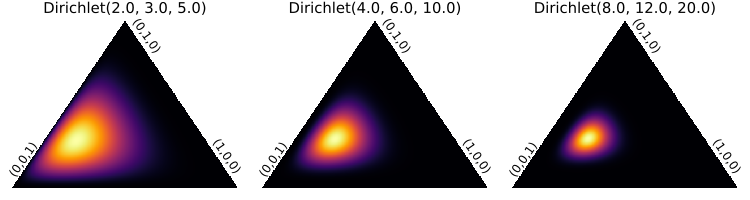

In [45]:
plot(plot_dirichlet(2, 3, 5), plot_dirichlet(4, 6, 10), plot_dirichlet(8, 12, 20);
    size=(750, 200), layout=(1,3))

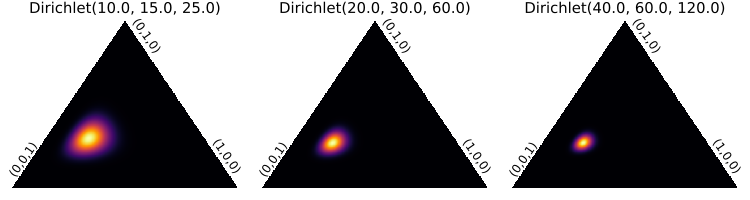

In [46]:
plot(plot_dirichlet(10, 15, 25), plot_dirichlet(20, 30, 60), plot_dirichlet(40, 60, 120);
    size=(750, 200), layout=(1,3))

__パラメータの大きなDirichlet分布は多変量正規分布で近似され, パラメータを大きくして行くと分布は一点に集中して行く.__

### 多変数ベータ函数のガンマ函数表示の証明

$z = x_1+\cdots+x_{n+1}$, $t_i = x_i/z$ とおく. 函数 $f(z,t_1,\ldots,t_n)$ について次の積分を考える:

$$
J[f] =
\int_0^\infty\cdots\int_0^\infty
f(z,t_1,\ldots,t_n)\,
e^{-(x_1+\cdots+x_{n+1})} x_1^{\alpha_1-1}\cdots x_{n+1}^{\alpha_{n+1}-1}\,dx_1\cdots dx_{n+1}.
$$

本当は $z$, $t_i$ に $z = x_1+\cdots+x_{n+1}$, $t_i = x_i/z$ を代入した式を書きたかったのだが, 式が煩雑に横に長くなり過ぎるのでそうしていない.  この式の $z$, $t$ にはそのように代入してから積分を行うという意味だと解釈する必要がある.  そのとき

$$
J[f] =
\int_0^\infty\cdots\int_0^\infty\left(\int_0^\infty
f(z,t_1,\ldots,t_n)\,
e^{-(x_1+\cdots+x_{n+1})} x_1^{\alpha_1-1}\cdots x_{n+1}^{\alpha_{n+1}-1}\,dx_{n+1}\right)
dx_1\cdots dx_n
$$

における内側の積分変数 $x_{n+1}$ を $x_{n+1} = z - (x_1+\cdots+x_n)$ を使って $z$ に変換すると, $z$ の動く範囲は $x_1+\cdots+x_n < z < \infty$ になるので,

$$
J[f] =
\int_0^\infty\cdots\int_0^\infty\left(\int_{x_1+\cdots+x_n}^\infty
f(z,t_1,\ldots,t_n)\,
e^{-z} x_1^{\alpha_1-1}\cdots x_n^{\alpha_n-1}(z - (x_1+\cdots+x_n))^{\alpha_{n+1}-1}\,dz\right)
dx_1\cdots dx_n.
$$

この $n+1$ 重積分において $(x_1,\ldots,x_n,z)$ は $x_1,\ldots,x_n > 0$ かつ $x_1+\cdots+x_n < z$ を満たす範囲を動く.  ゆえに,

$$
\Delta_n(z) =
\{\,(x_1,\ldots,x_n)\in \R_{>0}^n \mid x_1 + \cdots + x_n < z \,\}
$$

とおくと, 上の $n+1$ 重積分は次のように積分順序を交換できる:

$$
J[f] =
\int_0^\infty\left(\int\!\!\cdots\!\!\int_{\Delta_n(z)}
f(z,t_1,\ldots,t_n)\,
e^{-z} x_1^{\alpha_1-1}\cdots x_n^{\alpha_n-1}(z - (x_1+\cdots+x_n))^{\alpha_{n+1}-1}\,dx_1\cdots dx_n \right)
dz.
$$

積分変数 $x_1,\ldots,x_n$ を $x_i = z t_i$ によって $t_1,\ldots,t_n$ に変換すると, $(t_1,\ldots,t_n)$ は$t_1,\ldots,t_n > 0$ かつ $t_1+\cdots+t_n < 1$ を満たす範囲を動くので,

$$
\Delta_n = \Delta_n(1) =
\{\,(t_1,\ldots,t_n)\in \R_{>0}^n \mid t_1 + \cdots + t_n < 1 \,\}
$$

に注意すれば, 次が成立することがわかる:

$$
J[f] =
\int_0^\infty\left(\int\!\!\cdots\!\!\int_{\Delta_n}
f(z,t_1,\ldots,t_n)\,
e^{-z} (z t_1)^{\alpha_1-1}\cdots (z t_n)^{\alpha_n-1}(z(1 - (t_1+\cdots+t_n)))^{\alpha_{n+1}-1}
\,(z\,dt_1)\cdots(z\,dt_n) \right)
dz.
$$

これは次のように整理される:

$$
\begin{aligned}
J[f] &=
\int_0^\infty\left(\int\!\!\cdots\!\!\int_{\Delta_n}
f(z,t_1,\ldots,t_n)\,
e^{-z} z^{\alpha_1+\cdots+\alpha_{n+1}-1}\,
t_1^{\alpha_1-1}\cdots t_n^{\alpha_n-1}(1 - (t_1+\cdots+t_n))^{\alpha_{n+1}-1}
\,dt_1\cdots dt_n \right)
dz.
\end{aligned}
$$

これが $J[f]$ について示したかった公式である.

特に $f=1$ のとき, $J[f]$ の定義より

$$
J[1] = \Gamma(\alpha_1)\cdots\Gamma(\alpha_{n+1})
$$

であることがわかり, 上で示した公式より,

$$
J[1] = \Gamma(\alpha_1+\cdots+\alpha_{n+1}) B(\alpha_1,\ldots,\alpha_{n+1})
$$

となることがわかる.  ゆえに

$$
\Gamma(\alpha_1)\cdots\Gamma(\alpha_{n+1}) =
\Gamma(\alpha_1+\cdots+\alpha_{n+1}) B(\alpha_1,\ldots,\alpha_{n+1}).
$$

すなわち

$$
B(\alpha_1, \ldots, \alpha_{n+1}) =
\frac{\Gamma(\alpha_1)\cdots\Gamma(\alpha_{n+1})}{\Gamma(\alpha_1+\cdots+\alpha_{n+1})}.
$$

### ガンマ分布とDirichlet分布の関係

前節の結果を使えば, ガンマ分布とベータ分布の関係の証明と全く同様に以下の結果を示せる.

$X_i \sim \op{Gamma}(\alpha_i, 1)$ ($i=1,\ldots,n$) でかつそれらは独立だと仮定する. それらが独立であるとは, $(X_1,\ldots,X_n)$ について

$$
E[f(X_1,\ldots,X_n)] = \frac{1}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_n)}
\int\!\!\cdots\!\!\int f(x_1,\ldots,x_n)
e^{-(x_1+\cdots+x_n)}x_1^{\alpha_1-1}\cdots x_n^{\alpha_n-1}\,dx_1\cdots dx_n
$$

が成立することと同値である. このとき,

$$
Z = X_1 + \cdots + X_n, \quad T_i = \frac{X_i}{Z}
$$

とおくと

$$
Z \sim \op{Gamma}(\alpha_1+\cdots+\alpha_n), \quad
(T_1,\ldots,T_{n-1}) \sim \op{Dirichlet}(\alpha_1,\ldots,\alpha_n).
$$

$Z$ と $(T_1,\ldots,T_{n-1})$ の独立性(同時確率密度函数がそれぞれの確率密度函数の積になること)も示せる.

### 問題: Dirichlet (1839)の公式の証明

$a_i, p_i, \alpha_i > 0$ と仮定する. 領域 $X$ を

$$
X =
\left\{\, (x_1,\ldots,x_n)\in\R_{\ge 0}^n \right.
\,\left|\, \left(\frac{x_1}{a_1}\right)^{p_1} + \cdots + \left(\frac{x_n}{a_n}\right)^{p_n} \le 1 \,\right\}
$$

と定める. 次の積分を求めよ:

$$
V = \int\!\!\cdots\!\!\int_X x_1^{\alpha_1-1}\cdots x_n^{\alpha_n-1}\,dx_1\cdots dx_n.
$$

__解答例:__ $X$ の定義を

$$
X =
\left\{\, (x_1,\ldots,x_n)\in\R_{> 0}^n \right.
\,\left|\, \left(\frac{x_1}{a_1}\right)^{p_1} + \cdots + \left(\frac{x_n}{a_n}\right)^{p_n} < 1 \,\right\}
$$

に置き換えて構わない. (等号部分の体積は $0$ なので積分に寄与しない.) このとき, 

$$
t_i = \left(\frac{x_i}{a_i}\right)^{p_i} \iff
x_i = a_i t_i^{1/p_i}
$$

という変換によって, 領域 $X$ と領域 $\Delta_n$ のあいだの一対一対応が得られる. ゆえに

$$
\begin{aligned}
V &= 
\int\!\!\cdots\!\!\int_{\Delta_n}
(a_i t_1^{1/p_1})^{\alpha_1-1}\cdots (a_n t_n^{1/p_n})^{\alpha_n-1}
\,\left(\frac{a_1}{p_1}t_1^{1/p_1 - 1} dt_1 \right)\cdots\left(\frac{a_n}{p_n} t_n^{1/p_n - 1} dt_n\right)
\\ &=
\frac{a_1^{\alpha_1}\cdots a_n^{\alpha_n}}{p_1\cdots p_n}
\int\!\!\cdots\!\!\int_{\Delta_n}
t_1^{\alpha_1/p_1-1} \cdots t_n^{\alpha_n/p_n-1}
\,dt_1\cdots dt_n =
\frac{a_1^{\alpha_1}\cdots a_n^{\alpha_n}}{p_1\cdots p_n}
B(\alpha_1/p_1, \ldots, \alpha_n/p_n, 1)
\\ &=
\frac{a_1^{\alpha_1}\cdots a_n^{\alpha_n}}{p_1\cdots p_n}
\frac{\Gamma(\alpha_1/p_1)\cdots\Gamma(\alpha_n/p_n)\Gamma(1)}{\Gamma(\alpha_1/p_1+\cdots+\alpha_n/p_n+1)} =
\frac{a_1^{\alpha_1}\cdots a_n^{\alpha_n}}{p_1\cdots p_n}
\frac{\Gamma(\alpha_1/p_1)\cdots\Gamma(\alpha_n/p_n)}{\Gamma(\alpha_1/p_1+\cdots+\alpha_n/p_n+1)}.
\end{aligned}
$$


__解答終__